# Customer Retention

E-retail factors for customer activation and retention: 

A case study from Indian e-commerce customers.Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty.A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention.Five major factors that contributed to the success of an e-commerce store have been identified as: service quality,system quality,information quality,trust and net benefit. 
The research furthermore investigated the factors that influence the online customers repeat purchase intention.The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. 

The data is collected from the Indian online shoppers.Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

Note : 
Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.   
Need not to create machine learning models /but still if anybody comes with it that is welcome.

Submission file needed to contain the below three files:

1. The jupyter notebook solution

2. The project report in pdf format

3. A PowerPoint presentation containing problem statement and understanding, EDA steps and visualizations, Steps and assumptions used to complete the project, analysis, and conclusion.



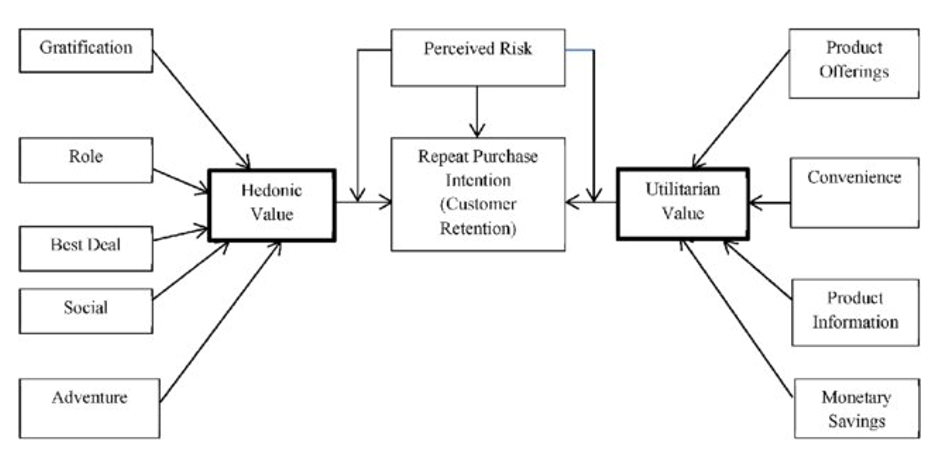

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Categorical_customer_retention_dataset.csv')
#Encoded Data-
#df = pd.read_csv('customer_retention_dataset.csv')

df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

Hedonic Value---> ( is defined as  value a customer receives based on the  experience of Products which are associated with fun, pleasure, and excitement, Examples---> perfumes, flowers, luxury watches)

--Psychological/Emotional experience

    1.Gratification
    
    2.Role
    
    3.Best Deal
    
    4.Social
    
    5.Adventure
    
Utilitarian Value--->(is defined as  value that a customer receives based on a task-related and rational consumption behavior,Examples-->personal computers,Detergents..

--Practical/Real 

    1.Product Offerings
    
    2.Convenience
    
    3.product Information
    
    4.Monetary Savings
    
  

Percieved Risk + Hedonic Value--->

    #.Repeat Purchase/Customer Rentention


Percieved Risk + Utilitarian Value--->

    #.Repeat Purchase/Customer Rentention 
    
-->Customer satisfaction ---==>key for purchase, repurchase intentions and customer loyalty

-->5 more ===service quality, system quality, information quality, trust and net benefit

====>Utilitarian values ++  Hedonistic values ====>  affect the repeat purchase intention (loyalty) positively


In [2]:
df.shape

(269, 71)

In [3]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

Univariate : In univariate analysis we will be using a single feature to analyze almost of its properties.

Bivariate : When we compare the data between exactly 2 features then its called bivariate analysis.

Multivariate: Comparing more than 2 variables is called as Multivariate analysis.

In [4]:
df.info

<bound method DataFrame.info of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                

In [5]:
df.describe(include='object')

1Gender of respondent 2 How old are you?   \
count                    269                 269   
unique                     2                   5   
top                   Female         31-40 years   
freq                     181                  81   

       3 Which city do you shop online from?  \
count                                    269   
unique                                    11   
top                                    Delhi   
freq                                      58   

       5 Since How Long You are Shopping Online ?  \
count                                         269   
unique                                          5   
top                                 Above 4 years   
freq                                           98   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                                 269                      
unique                                                  6                      
top                                    Less than 10 times                      
freq                                                  114                      

       7 How do you access the internet while shopping on-line?  \
count                                                 269         
unique                                                  4         
top                                       Mobile internet         
freq                                                  142         

       8 Which device do you use to access the online shopping?  \
count                                                 269         
unique                                                  4         
top                                            Smartphone         
freq                                                  141         

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                                 269                                                     
unique                                                  4                                                     
top                                                Others                                                     
freq                                                  134                                                     

       10 What is the operating system (OS) of your device?\t\t\t\t                                            \
count                                                 269                                                       
unique                                                  3                                                       
top                                 Window/windows Mobile                                                       
freq                                                  122                                                       

       11 What browser do you run on your device to access the website?\t\t\t                                                            \
count                                                 269                                                                                 
unique                                                  4                                                                                 
top                                         Google chrome                                                                                 
freq                                                  216                                                                                 

        ... Longer time to get logged in (promotion, sales period)  \
count   ...                                                269       
unique  ...                                                 10       
top     ...                                          Amazon.in       
freq    ...                                                 57      

In [6]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum().sum()

0

DataFrame is not having null values

In [7]:
# count of each dtype in dataframe
df.dtypes.value_counts()

object    70
int64      1
dtype: int64

In [8]:
dupli=df.duplicated()
df[dupli]

1Gender of respondent 2 How old are you?   \
72                   Male         21-30 years   
94                 Female         21-30 years   
95                 Female         21-30 years   
97                 Female  Less than 20 years   
99                 Female         41-50 yaers   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
72                                  Delhi   
94                          Greater Noida   
95                             Bangalore    
97                                  Solan   
99                                  Noida   
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
72                                              110044       
94                                              201308       
95                                              530068       
97                                              173229       
99                                              201308       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
72                                   2-3 years   
94                                   3-4 years   
95                                   2-3 years   
97                                   2-3 years   
99                               Above 4 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
72                                  41 times and above                      
94                                  41 times and above                      
95                                         11-20 times                      
97                                  Less than 10 times                      
99                                  Less than 10 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
72                                     Mobile internet         
94                                     Mobile Internet         
95                                               Wi-Fi         
97                                               Wi-Fi         
99                                               Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

Duplicate Values are possible to exist based on the nature of data collected

In [9]:
# strip whitespaces--Leading and trailing from column names 
df.columns = df.columns.str.strip()

# EDA

# Hedonic Value(HV) Analysis
# HV-Exploration of Gratification

In [10]:
Feature_Gratifiction= ['5 Since How Long You are Shopping Online ?',
                        '6 How many times you have made an online purchase in the past 1 year?',
                        '7 How do you access the internet while shopping on-line?',
                        '8 Which device do you use to access the online shopping?',
                        '22 Ease of navigation in website',
                        '24 User friendly Interface of the website',
                        '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
                        '27 Empathy (readiness to assist with queries) towards the customers',
                        '31 Enjoyment is derived from shopping online',
                        '36 User derive satisfaction while shopping on a good quality website or application',
                        '37 Net Benefit derived from shopping online can lead to users satisfaction',
                        '38 User satisfaction cannot exist without trust',
                        '45 You feel gratification shopping on your favorite e-tailer',
                        'Perceived Trustworthiness',
                        'Easy to use website or application',
                        '23 Loading and processing speed',
                        'Fast loading website speed of website and application',
                        'Website is as efficient as before',
                        '18 The content on the website must be easy to read and understand']

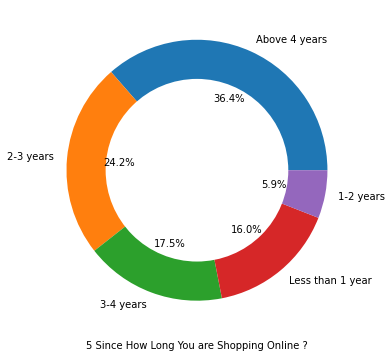

<Figure size 432x288 with 0 Axes>

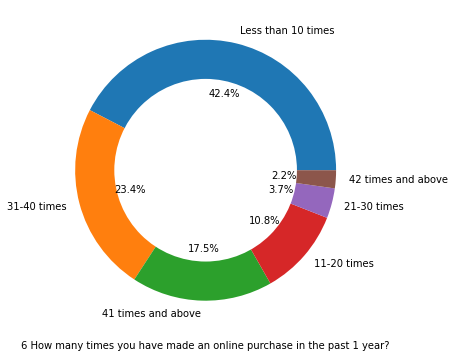

<Figure size 432x288 with 0 Axes>

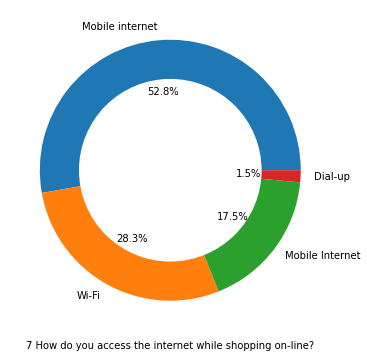

<Figure size 432x288 with 0 Axes>

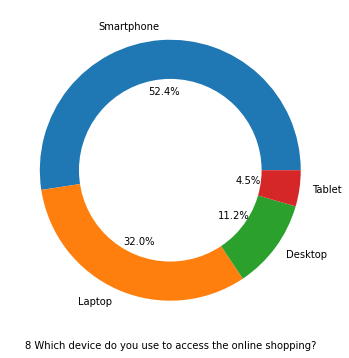

<Figure size 432x288 with 0 Axes>

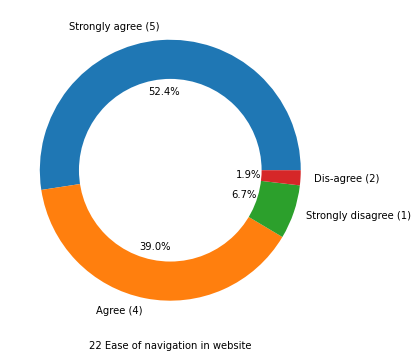

<Figure size 432x288 with 0 Axes>

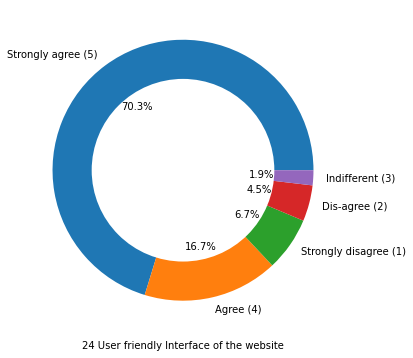

<Figure size 432x288 with 0 Axes>

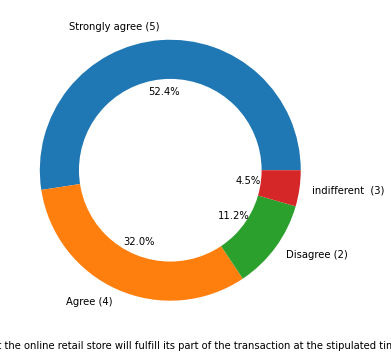

<Figure size 432x288 with 0 Axes>

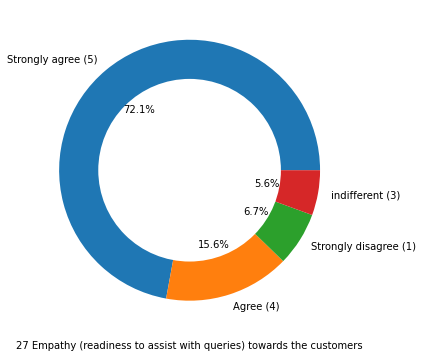

<Figure size 432x288 with 0 Axes>

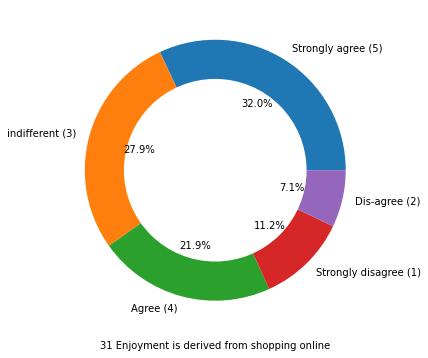

<Figure size 432x288 with 0 Axes>

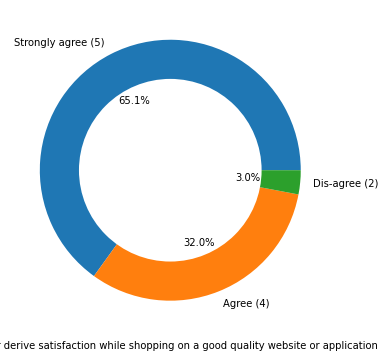

<Figure size 432x288 with 0 Axes>

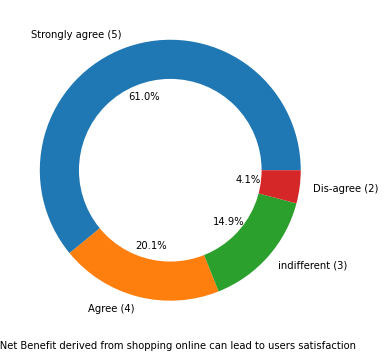

<Figure size 432x288 with 0 Axes>

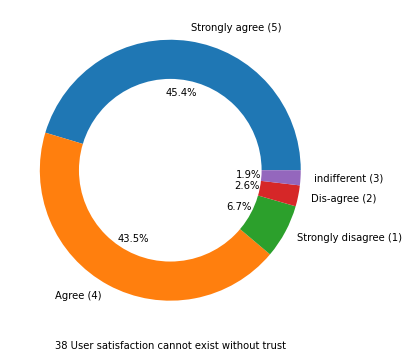

<Figure size 432x288 with 0 Axes>

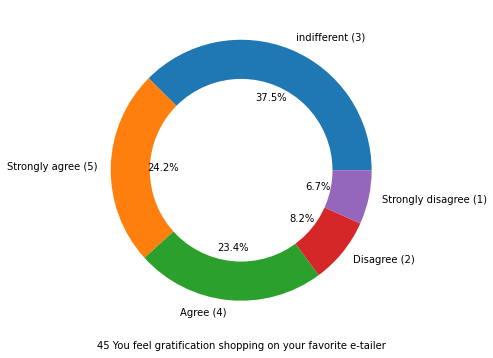

<Figure size 432x288 with 0 Axes>

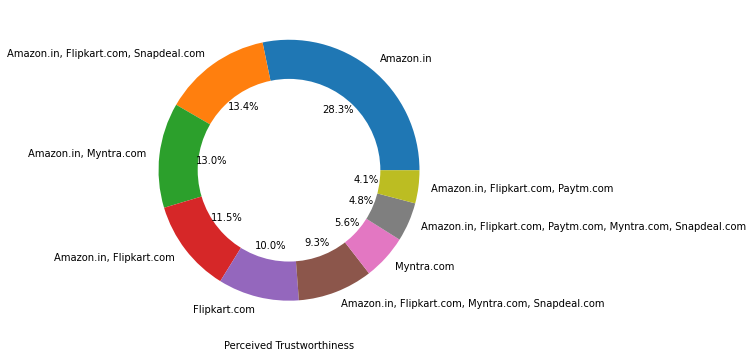

<Figure size 432x288 with 0 Axes>

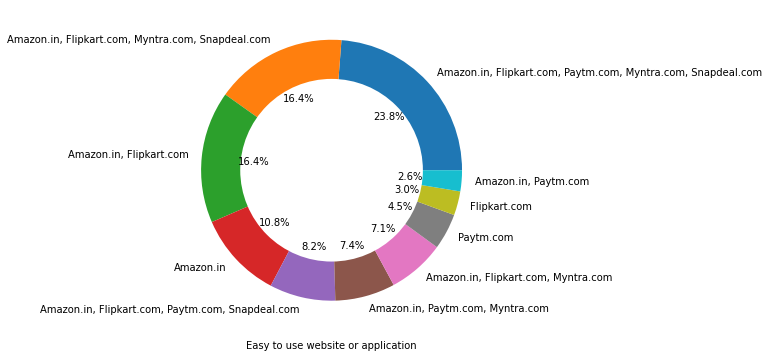

<Figure size 432x288 with 0 Axes>

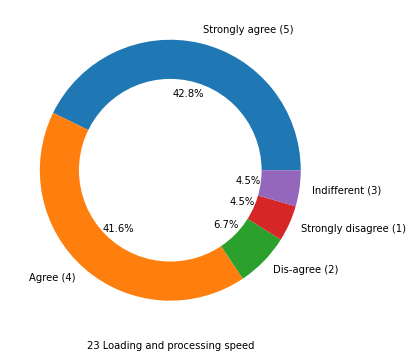

<Figure size 432x288 with 0 Axes>

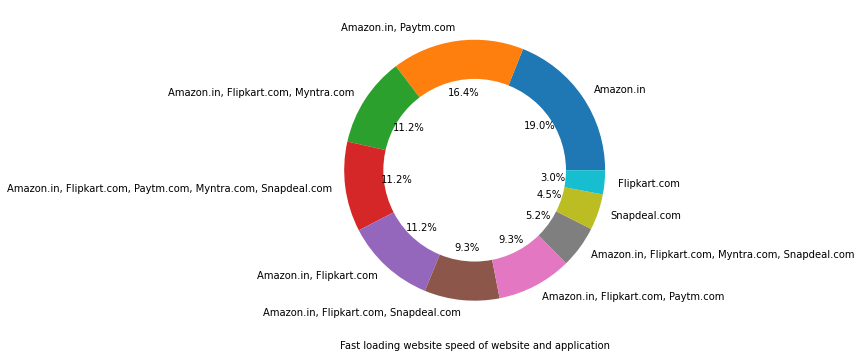

<Figure size 432x288 with 0 Axes>

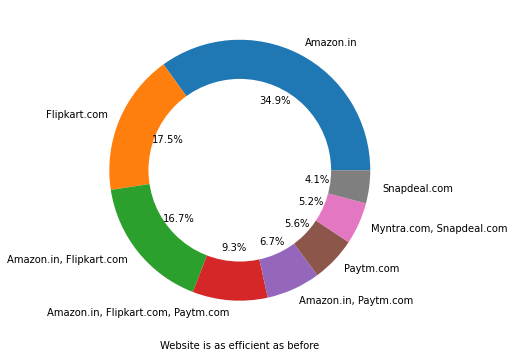

<Figure size 432x288 with 0 Axes>

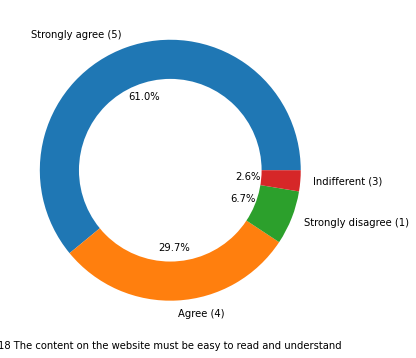

<Figure size 432x288 with 0 Axes>

In [11]:
for i in Feature_Gratifiction:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Observation :


Pie plot also show that being able to guarantee the privacy of the customer is important silent feature for product selection.
Another most important for product companies is availability of communication channels.

32% customer enjoyment from online shopping strongly matter 

85 % of customer thinks, online shopping is convenient & flexible than physical shopping.

45.4% of customers strongly agree over fact that user satisfaction cannot exist without trust.

42.8 % customer strongly agree and 41.6 % customer agree over high loading & processing speed.


<AxesSubplot: xlabel='31 Enjoyment is derived from shopping online', ylabel='count'>

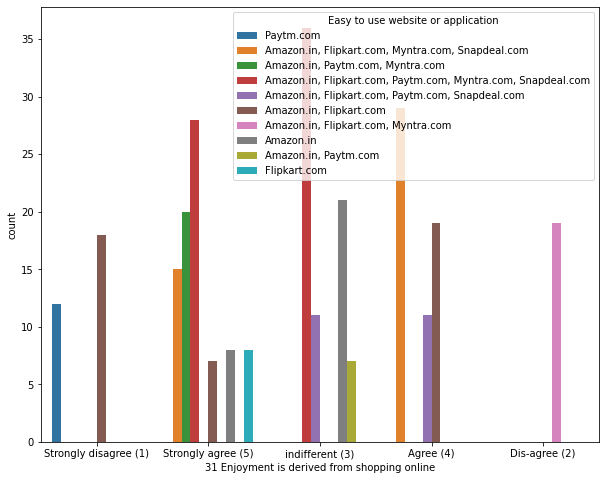

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['31 Enjoyment is derived from shopping online'],
              hue=df['Easy to use website or application'])

Observation :

More people strongly agree to derive Enjoyment  from shopping online based on the easiness of the application from Amazon,flipkart,paytm,SnapDeal,Myntra  


# HV-Exploration of Role & Best Deal

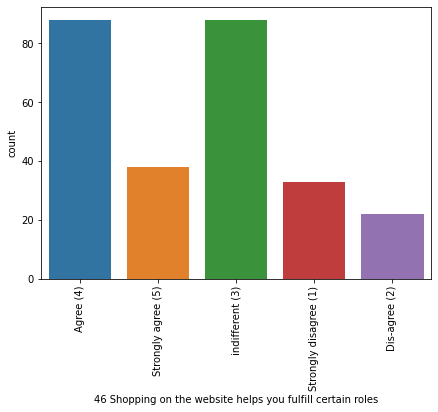

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#Factor plot for Role
plt.figure(figsize = (7,5))
sns.countplot(x='46 Shopping on the website helps you fulfill certain roles',data=df)
plt.xticks(rotation=90)
plt.show()


In [14]:
Feature_BestDeal = ['Longer time to get logged in (promotion, sales period)',
                    'Longer time in displaying graphics and photos (promotion, sales period)',
                    'Late declaration of price (promotion, sales period)',
                    'Longer page loading time (promotion, sales period)',
                    'Limited mode of payment on most products (promotion, sales period)',
                    '14 How much time do you explore the e- retail store before making a purchase decision?']

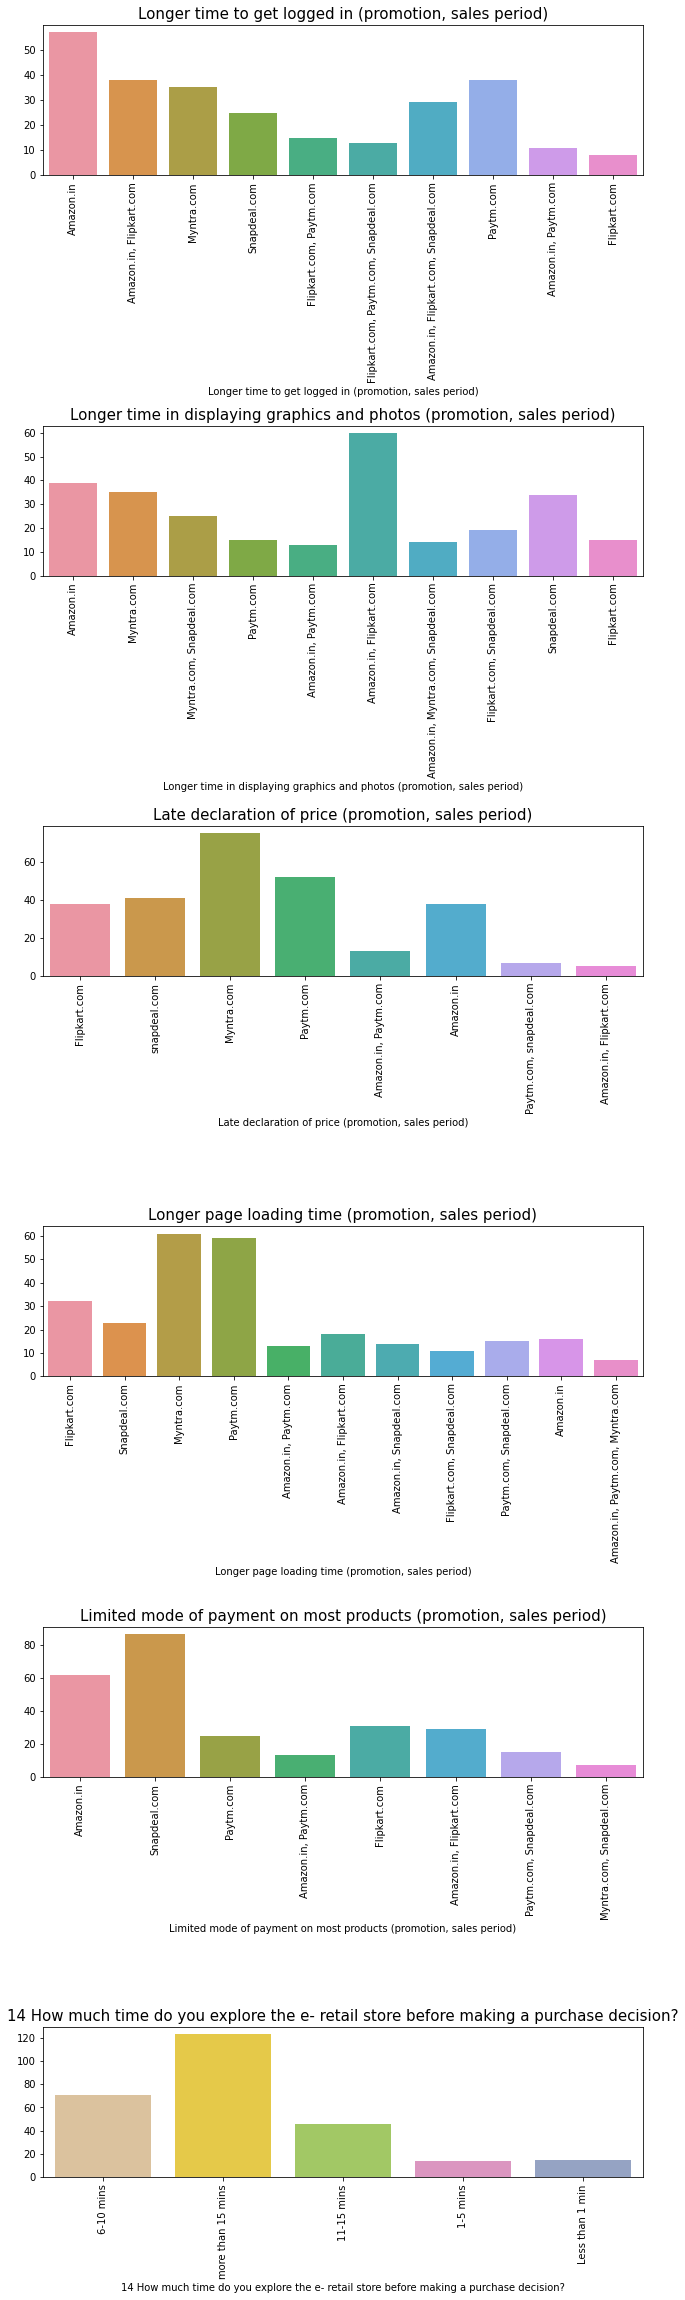

In [15]:
sns.set_palette('Set2_r')
plt.figure(figsize=(9,36), facecolor='white')
plotnumber =1
for i in Feature_BestDeal:
    if plotnumber <=7:
        ax = plt.subplot(7,1,plotnumber)
        sns.countplot(x=df[i])
        plt.title(i,fontsize=15)
        plt.xticks(rotation=90)
        plt.ylabel('')
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation

Longer time to get logged in can annoyed customer. Amazon.in take longer time to logged in 
while Flipkart.com take least time among all.

Majority of people agree that Amazon.in, Flipkart.com takes longer time in loading images & content.

Myntra.com followed by Paytm.com take longer page loading time.

Most of the Customers spend more than 15 mins before making Purchase decision.Followed by 
6-10 mins before making purchase decision.


# HV- Exploring Social & Adventure

In [16]:
Feature_social = [  '12 Which channel did you follow to arrive at your favorite online store for the first time?',
                    '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
                    '44 Shopping on your preferred e-tailer enhances your social status',
                    'Presence of online assistance through multi-channel',
                    'From the following, tick any (or all) of the online retailers you have shopped from;',
                    'Which of the Indian online retailer would you recommend to a friend?']

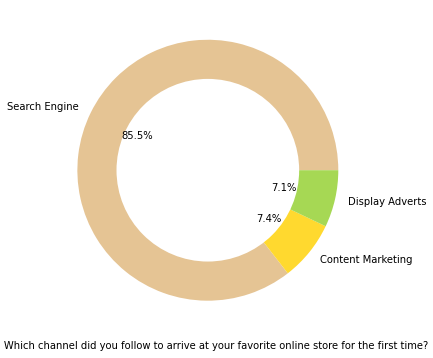

<Figure size 432x288 with 0 Axes>

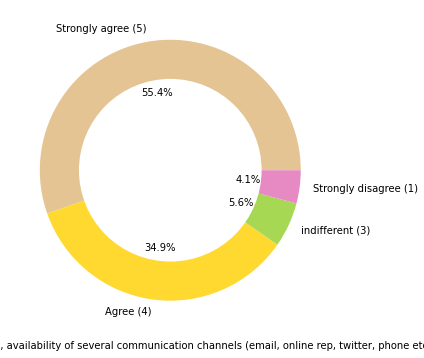

<Figure size 432x288 with 0 Axes>

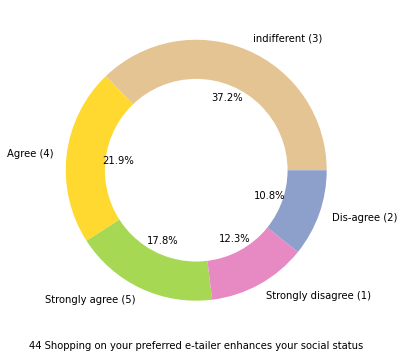

<Figure size 432x288 with 0 Axes>

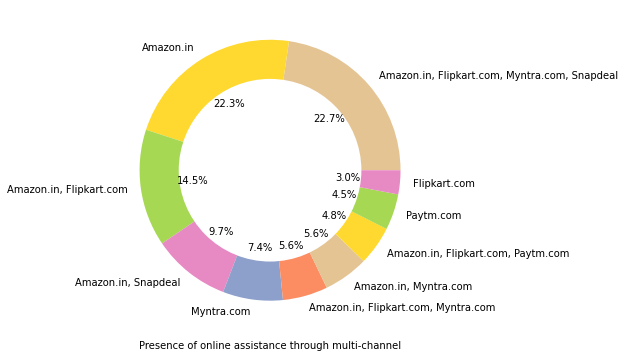

<Figure size 432x288 with 0 Axes>

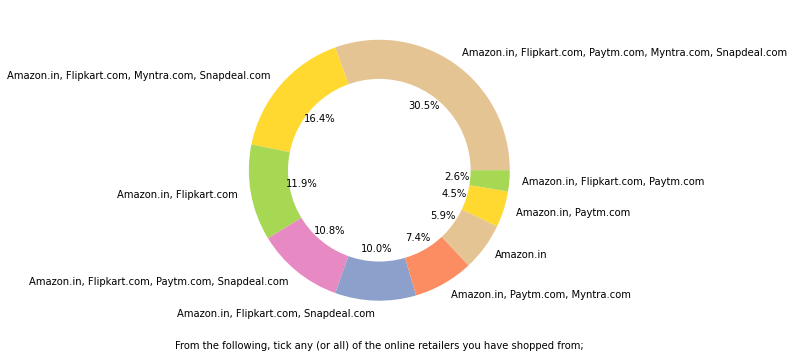

<Figure size 432x288 with 0 Axes>

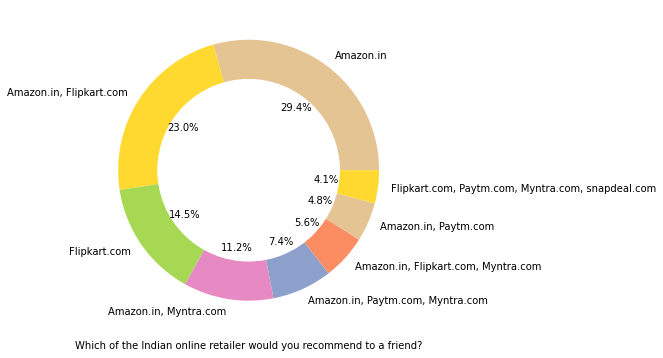

<Figure size 432x288 with 0 Axes>

In [17]:
for i in Feature_social:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Observation

Another most important for product companies is availability of communication channels


We can see different peoples have different opinions about connection between e-tailer & social status.
Same with gratification on favorite e-tailer.


In [18]:
Feature_adventure = ['13 After first visit, how do you reach the online retail store?',
                    '43 Shopping on the website gives you the sense of adventure']
   

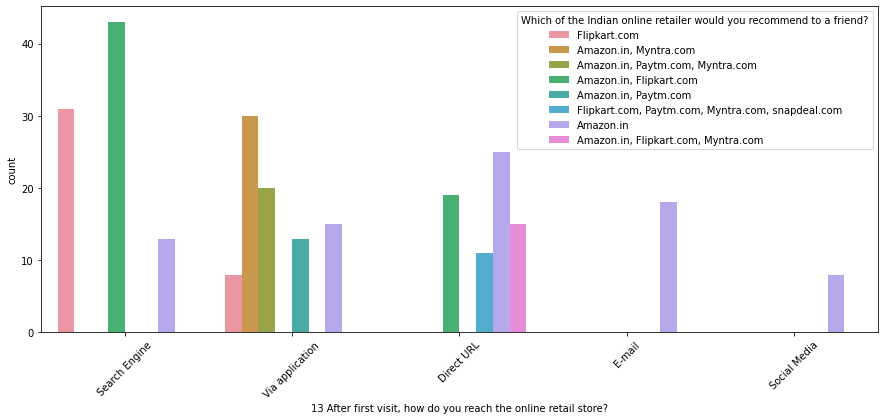

<Figure size 432x288 with 0 Axes>

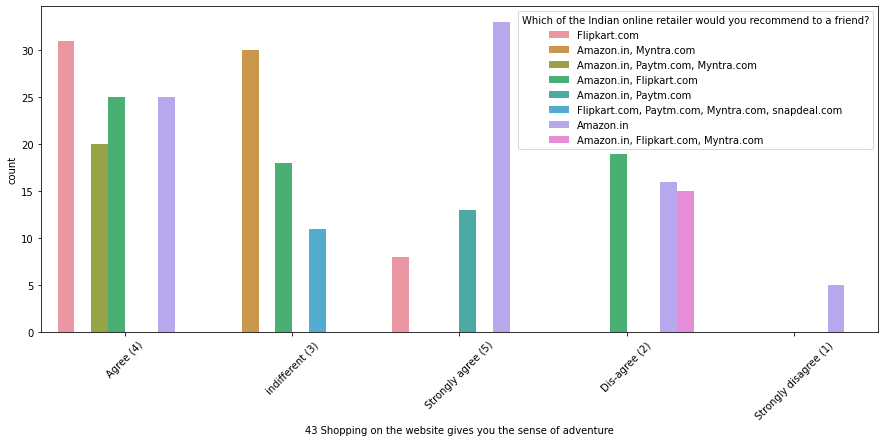

<Figure size 432x288 with 0 Axes>

In [19]:
for i in Feature_adventure:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Customers seem to be more loyal to amazon, flipkart and paytm as
even though many of them have given negative remarks about them still they would recommend these platforms to their friend


 Online shopping for most of the customers  strongly gives the sense of adventure.


<AxesSubplot: xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

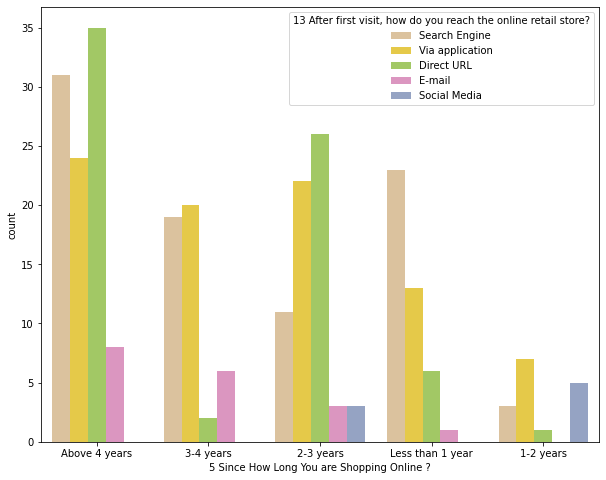

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['5 Since How Long You are Shopping Online ?'],
              hue=df['13 After first visit, how do you reach the online retail store?'])

Even though people who are shopping online for more than 3 years donot use the application rather use search engine and direct url's in large number 
which indicates that online brands should update all their platforms rather than just application.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

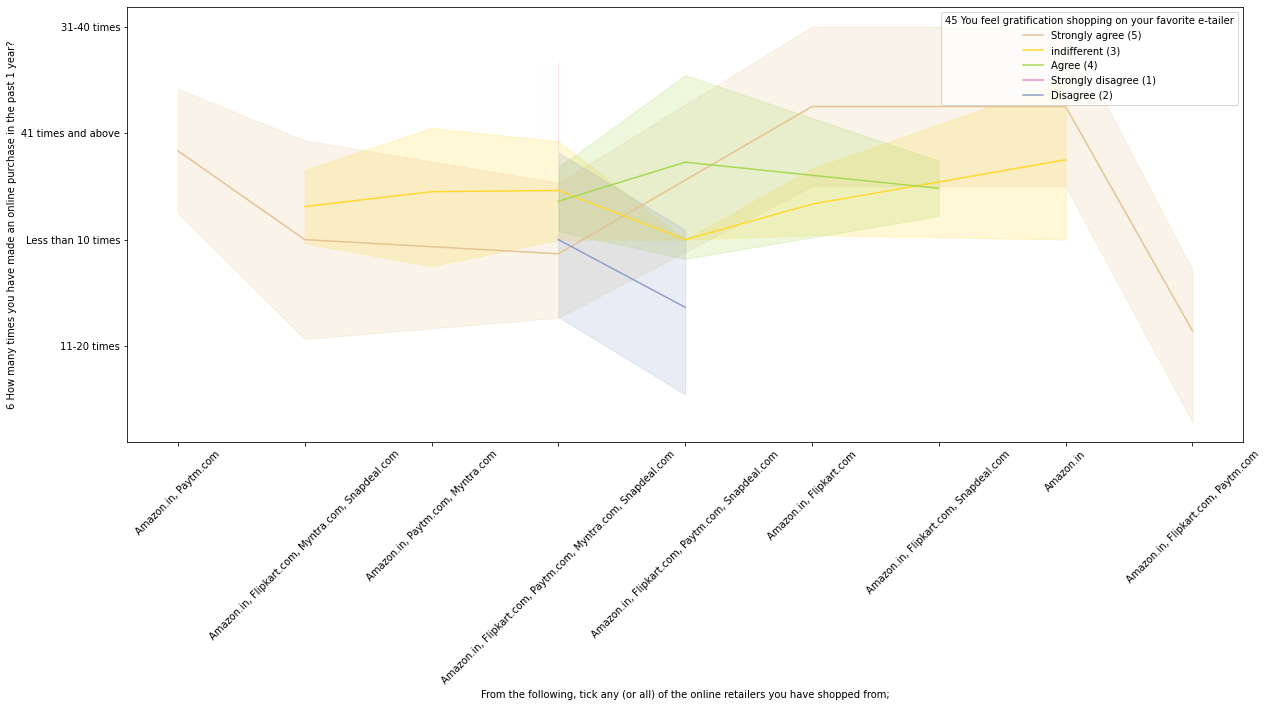

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['From the following, tick any (or all) of the online retailers you have shopped from;'],
              y= df['6 How many times you have made an online purchase in the past 1 year?'],hue=df['45 You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

Heavy shoppers who shop more than 41 times a year shop from all the online brands, 

some of the people who shop for 32-40 and less than 10 times a year seem to exclude myntra.

People shop from Amazon and flipkart whatever be the case.

# Utilitarian Value(UV) Analysis

# UV-Exploring Product  Offerings & Info

In [22]:
Feature_productOffer = ['34 Gaining access to loyalty programs is a benefit of shopping online',
                        'Wild variety of product on offer',
                        '39 Offering a wide variety of listed product in several category']

In [23]:
Feature_productInfo = ['20 Complete information on listed seller and product being offered is important for purchase decision.',
                        '21 All relevant information on listed products must be stated clearly',
                        '35 Displaying quality Information on the website improves satisfaction of customers',
                        '40 Provision of complete and relevant product information',
                        'Complete, relevant description information of products',
                        '19 Information on similar product to the one highlighted  is important for product comparison']           

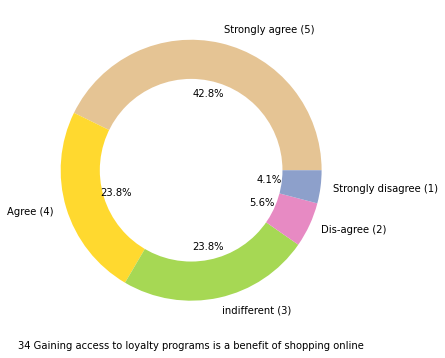

<Figure size 432x288 with 0 Axes>

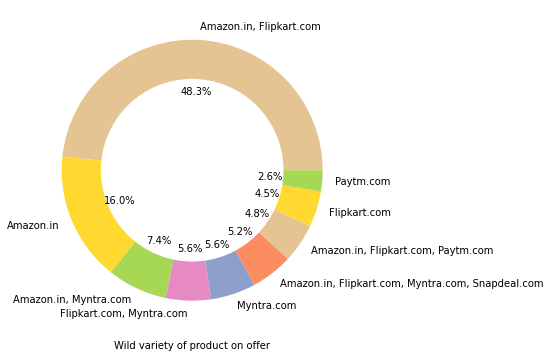

<Figure size 432x288 with 0 Axes>

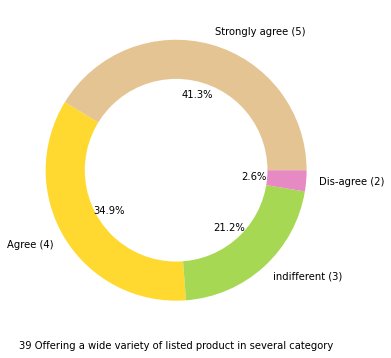

<Figure size 432x288 with 0 Axes>

In [24]:
for i in Feature_productOffer:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Observation

More customers look for Product offers while shopping online


More than 60% of customer agree or strongly agree that complete information on listed seller and product being offered is important for purchase decision.

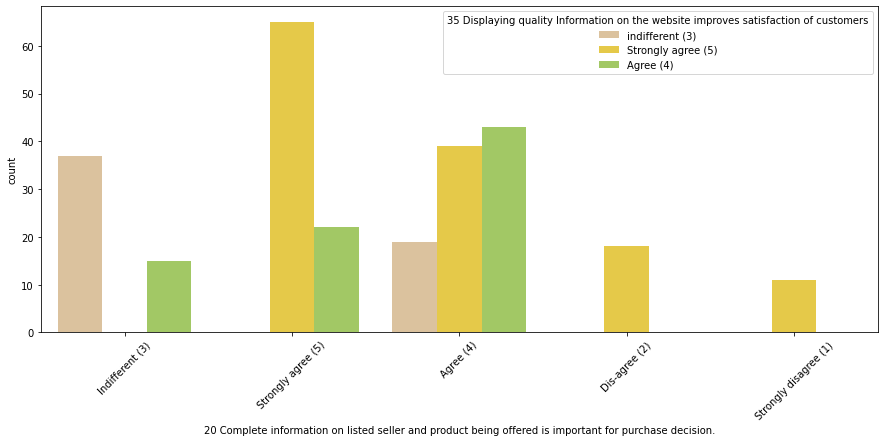

<Figure size 432x288 with 0 Axes>

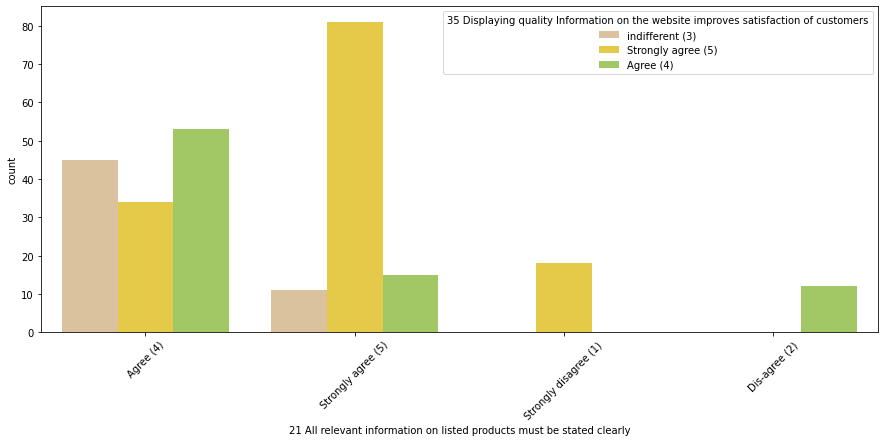

<Figure size 432x288 with 0 Axes>

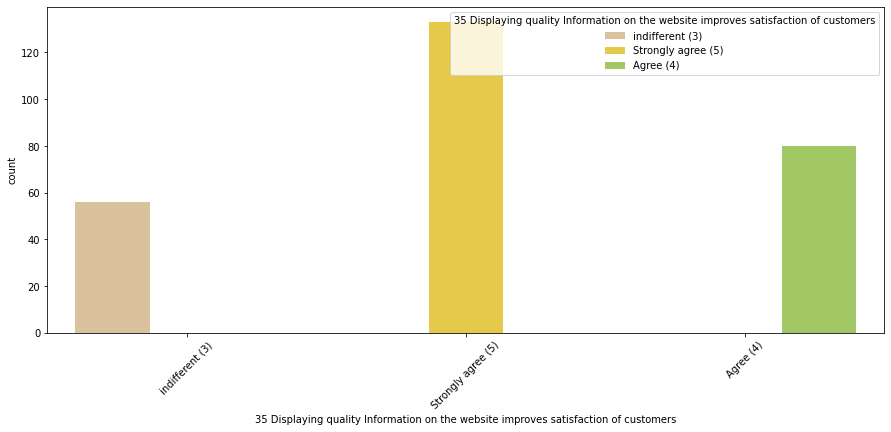

<Figure size 432x288 with 0 Axes>

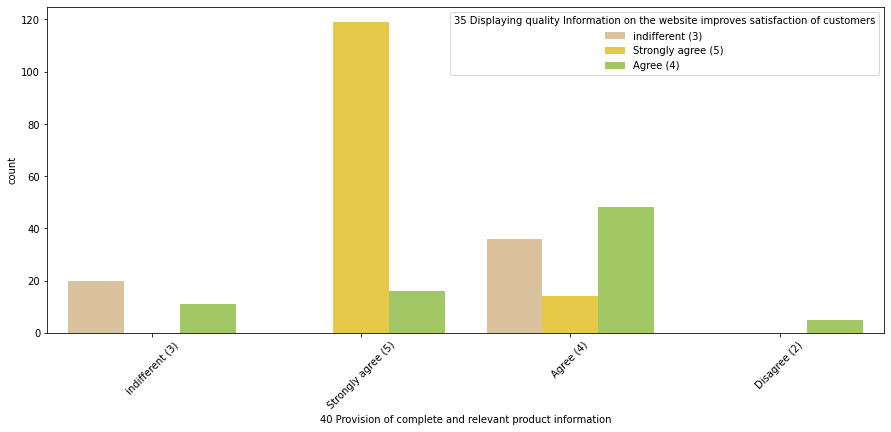

<Figure size 432x288 with 0 Axes>

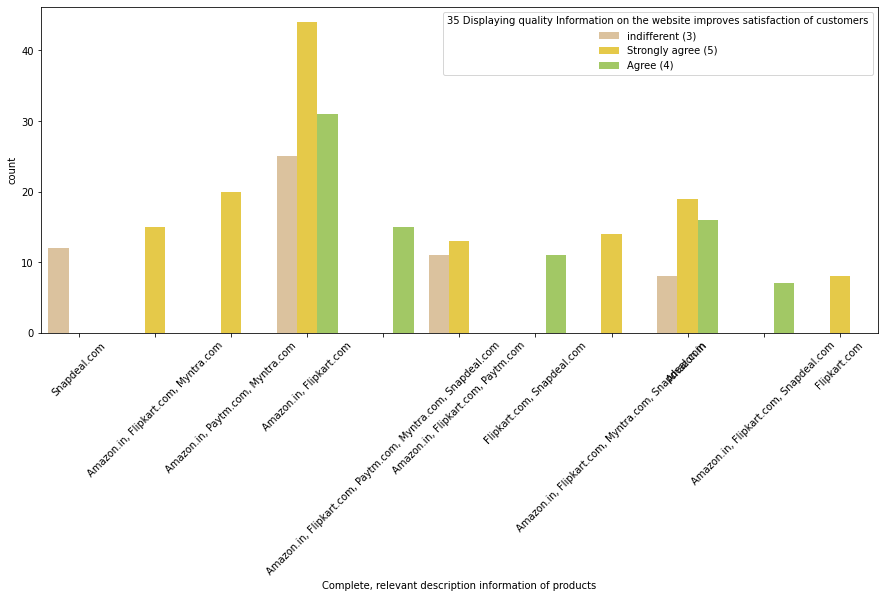

<Figure size 432x288 with 0 Axes>

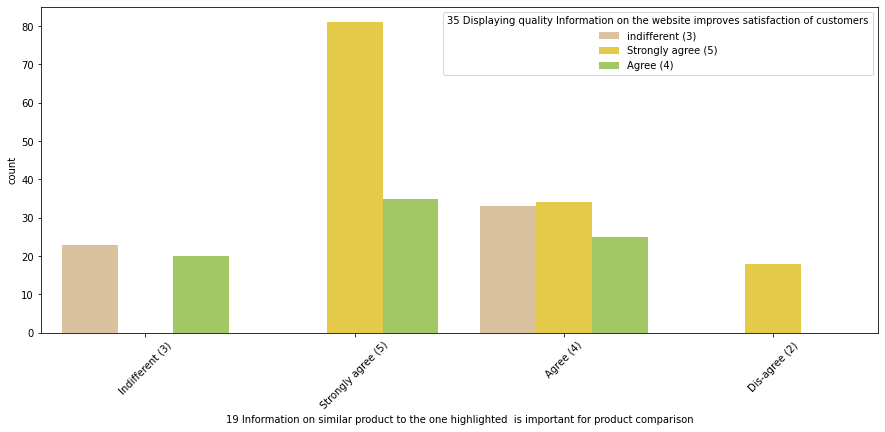

<Figure size 432x288 with 0 Axes>

In [25]:
for i in Feature_productInfo:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i],hue=df['35 Displaying quality Information on the website improves satisfaction of customers'])
        plt.xticks(rotation=45)
        plt.figure()

Observation :

Most of the Customers strongly agree thinks that companies readiness to assist customer queuries related to product is important factor in purchase decision.

Large portion of  customers strongly agree  that content on website must be easy to read and understand.

Customer strongly agree  that information on similar product to hightlighted on website for product comparison.

More than 90% of customer agree or strongly agree that all relevant information on listed products must be stated clearly.



# UV-Exploring Convenience & Monetory Savings

In [26]:
Feature_convenience = ['25 Convenient Payment methods',
                    '32 Shopping online is convenient and flexible',
                    '33 Return and replacement policy of the e-tailer is important for purchase decision',
                    '15 What is your preferred payment Option?',
                    '42 The Convenience of patronizing the online retailer',
                     'Quickness to complete purchase',
                     'Availability of several payment options']

In [27]:
Feature_Savings = ['30 Online shopping gives monetary benefit and discounts',
                   '41 Monetary savings',
                   '47 Getting value for money spent']

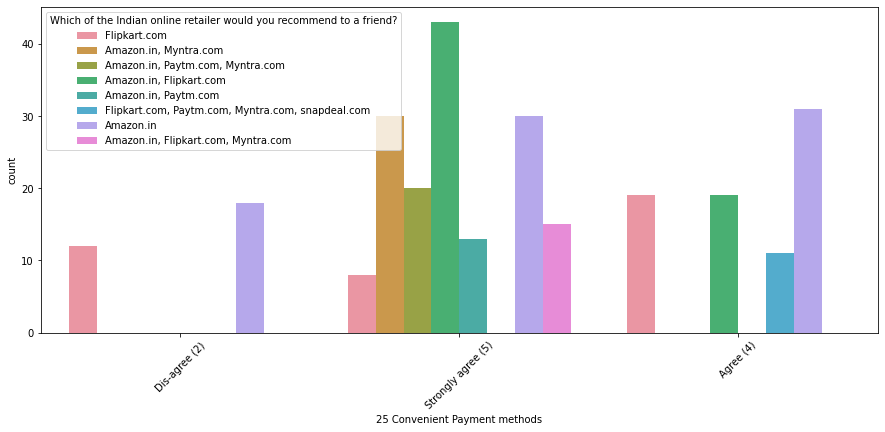

<Figure size 432x288 with 0 Axes>

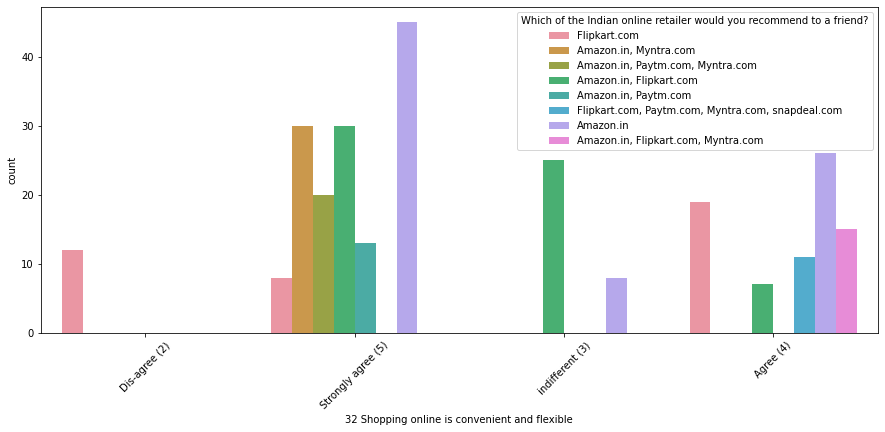

<Figure size 432x288 with 0 Axes>

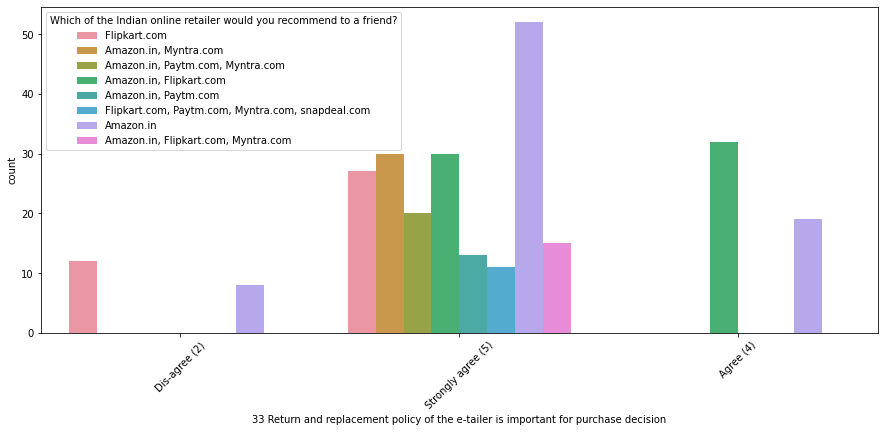

<Figure size 432x288 with 0 Axes>

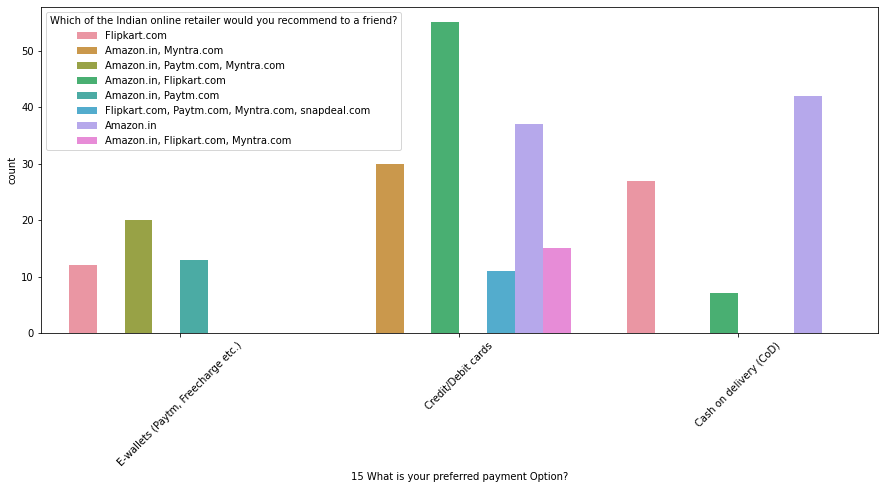

<Figure size 432x288 with 0 Axes>

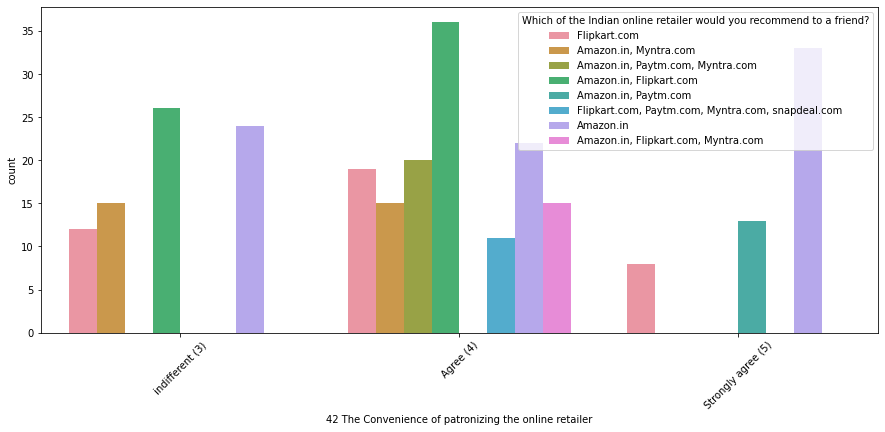

<Figure size 432x288 with 0 Axes>

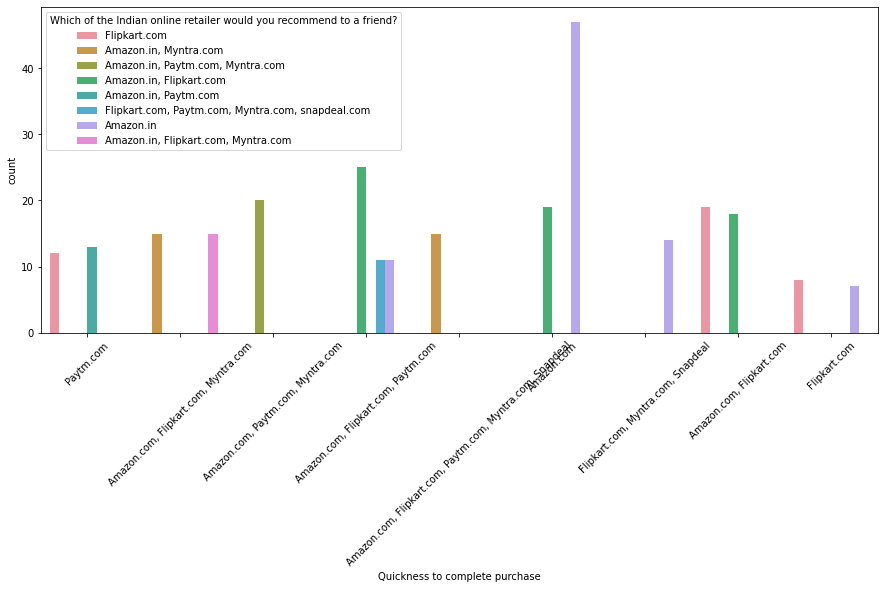

<Figure size 432x288 with 0 Axes>

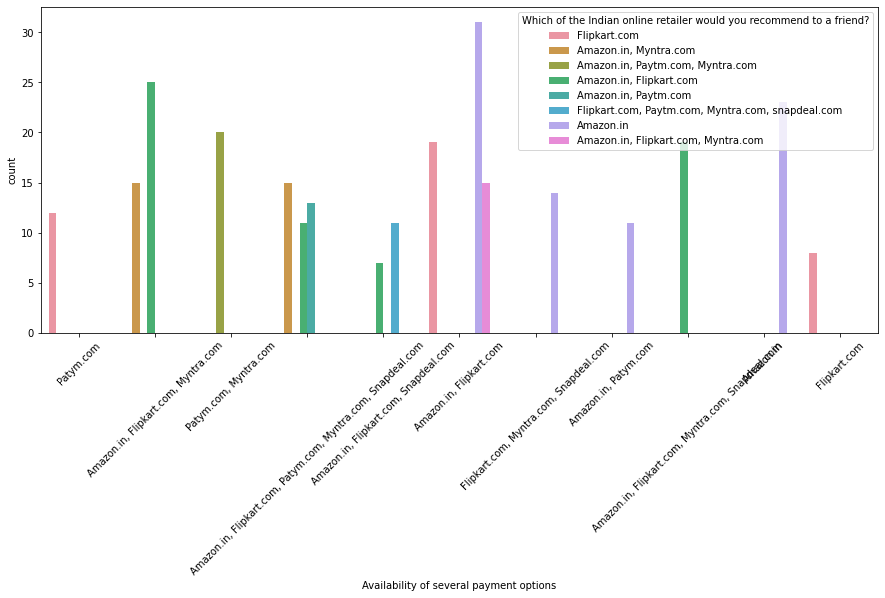

<Figure size 432x288 with 0 Axes>

In [28]:
for i in Feature_convenience:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Observation :
   
Majority of people also think that Amazon.in tops the chart in terms of quickness purchase process compare to others.

Majority of customers think that Amazon.in, Flipkart.com provides several payment options compare to others.

Safe & Speed delivery very much deciding factor in terms of purchase. 

In terms of speed of delivery Amazon.in is much better than other online shopping platform and Flipkart.com worst among all in terms of speed delivery of product.

Most of the customer thinks that return & replacement policy of e-seller is important factor for making purchase decision.

We also see very few peoples trust payment platform paytm.



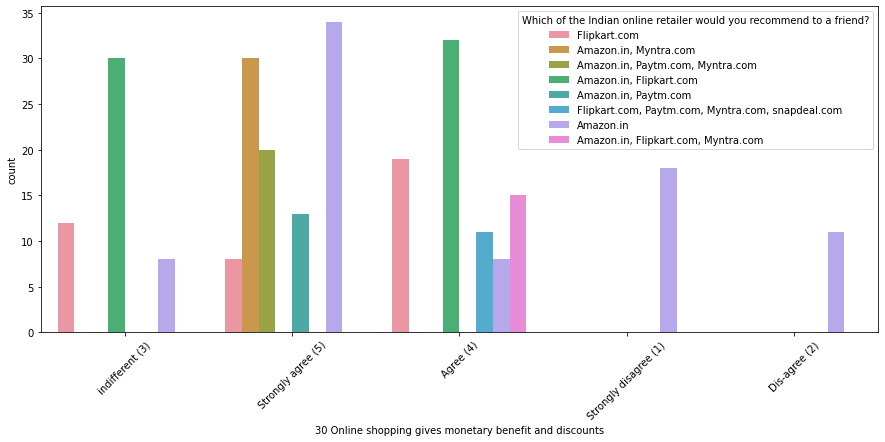

<Figure size 432x288 with 0 Axes>

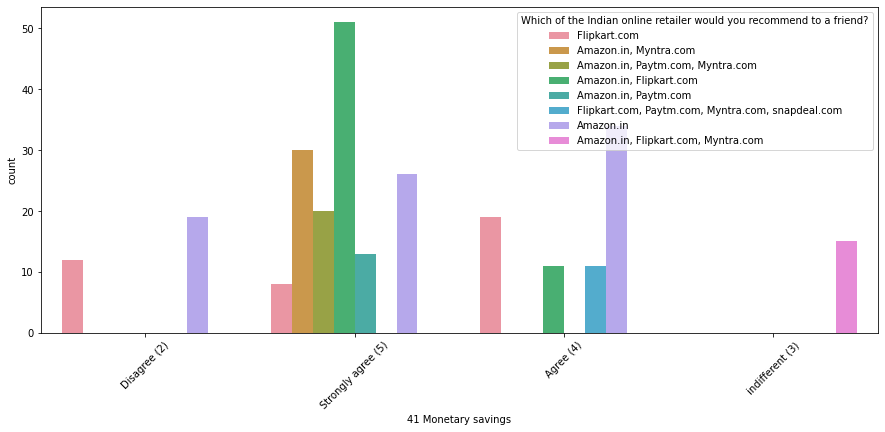

<Figure size 432x288 with 0 Axes>

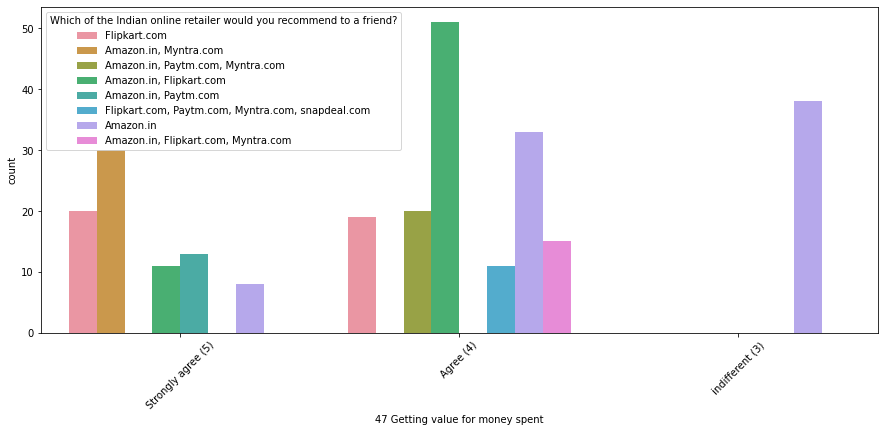

<Figure size 432x288 with 0 Axes>

In [29]:
for i in Feature_Savings:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Observation :
    
Around 83% customer pursue online shopping for Monetary Savings.

55.4% people strongly agree and 30.5% people agree that they prefer online shopping because they get value of money spent.

# Perceived Risks Analysis

In [30]:
Feature_risk = ['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
                '17 Why did you abandon the “Bag”, “Shopping Cart”?',
                '28 Being able to guarantee the privacy of the customer',
                'Change in website/Application design',
                'Privacy of customers’ information',
                'Longer delivery period',
                'Security of customer financial information']

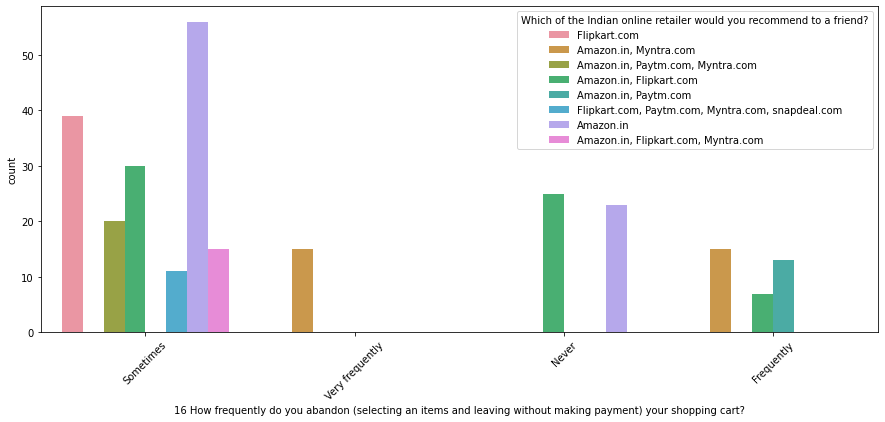

<Figure size 432x288 with 0 Axes>

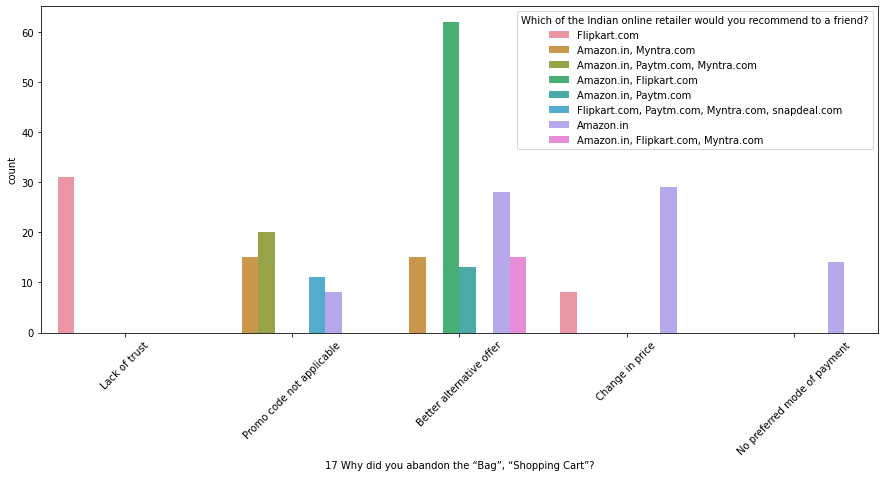

<Figure size 432x288 with 0 Axes>

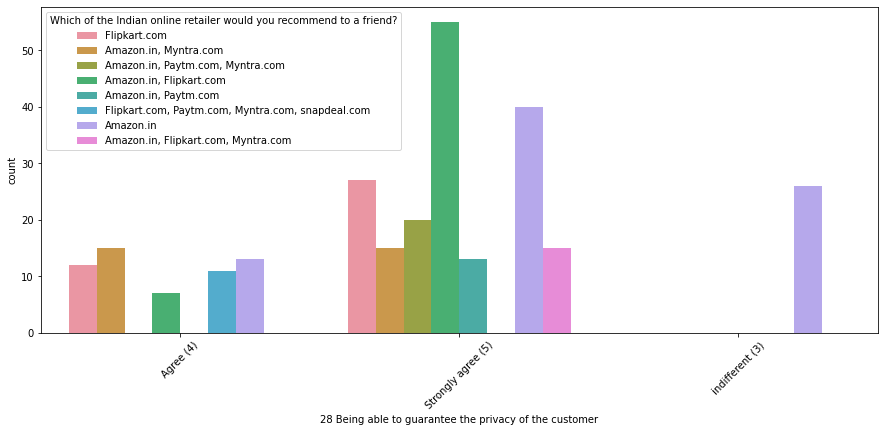

<Figure size 432x288 with 0 Axes>

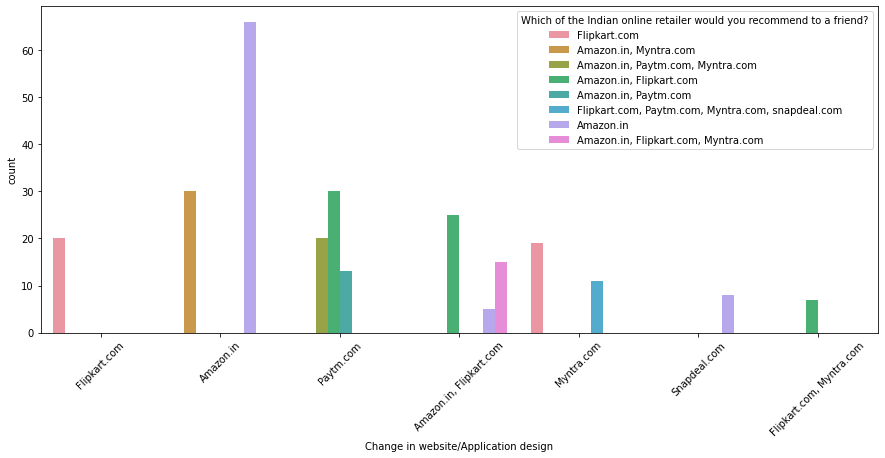

<Figure size 432x288 with 0 Axes>

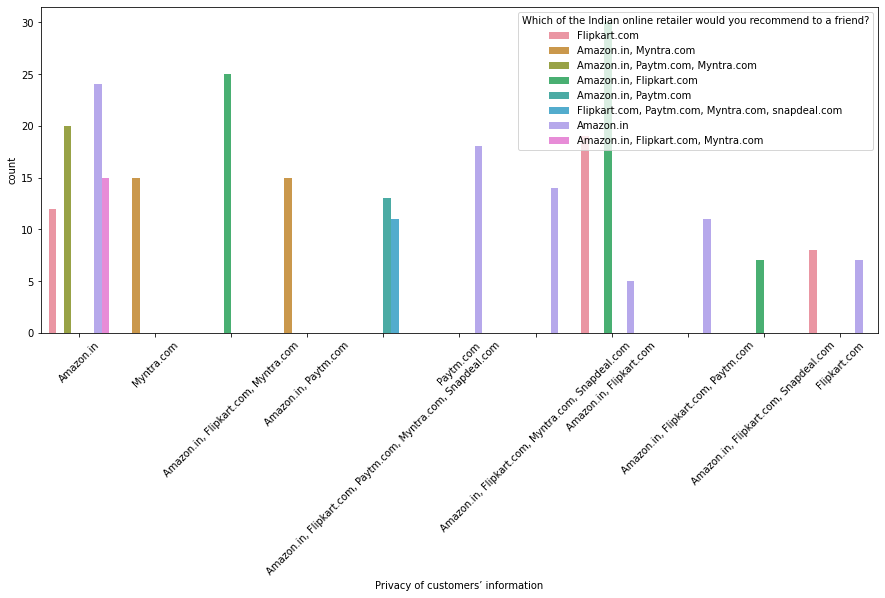

<Figure size 432x288 with 0 Axes>

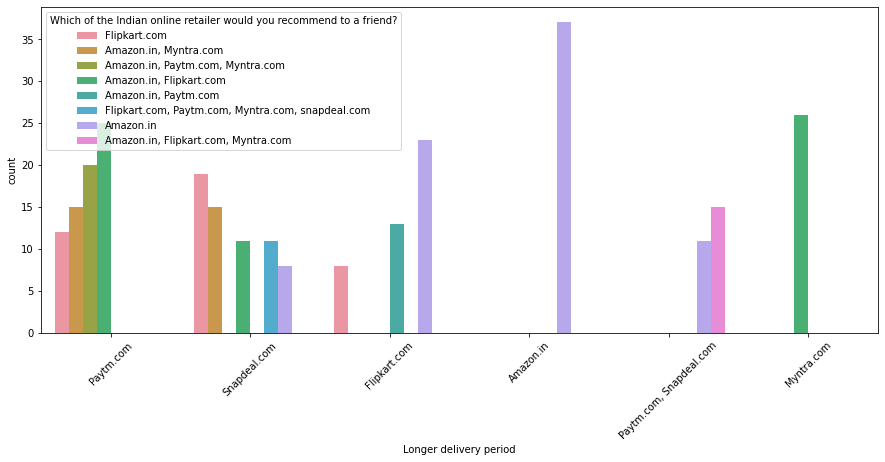

<Figure size 432x288 with 0 Axes>

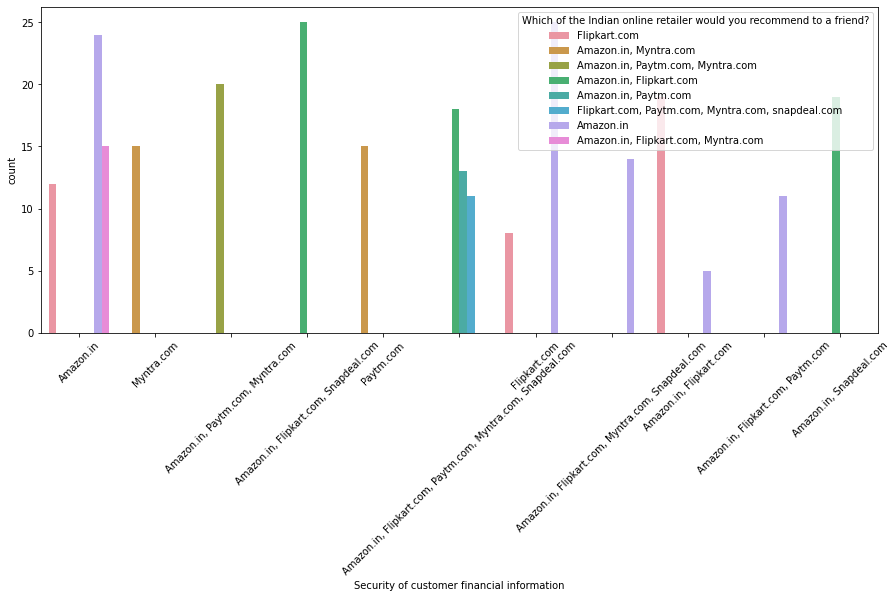

<Figure size 432x288 with 0 Axes>

In [31]:
for i in Feature_risk:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Observation

If we add reason mention in previous point we can conclude that 84% customer abandon cart due to cost & discount tradeoff.

Customers seem to be more loyal to amazon, flipkart and paytm as even though 
many of them have given negative remarks about them still they would recommend these platforms to their friend

Majority of customer trust Amazon.in followed by Flipkart.in over Security of thier financial information.


<AxesSubplot: xlabel='17 Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

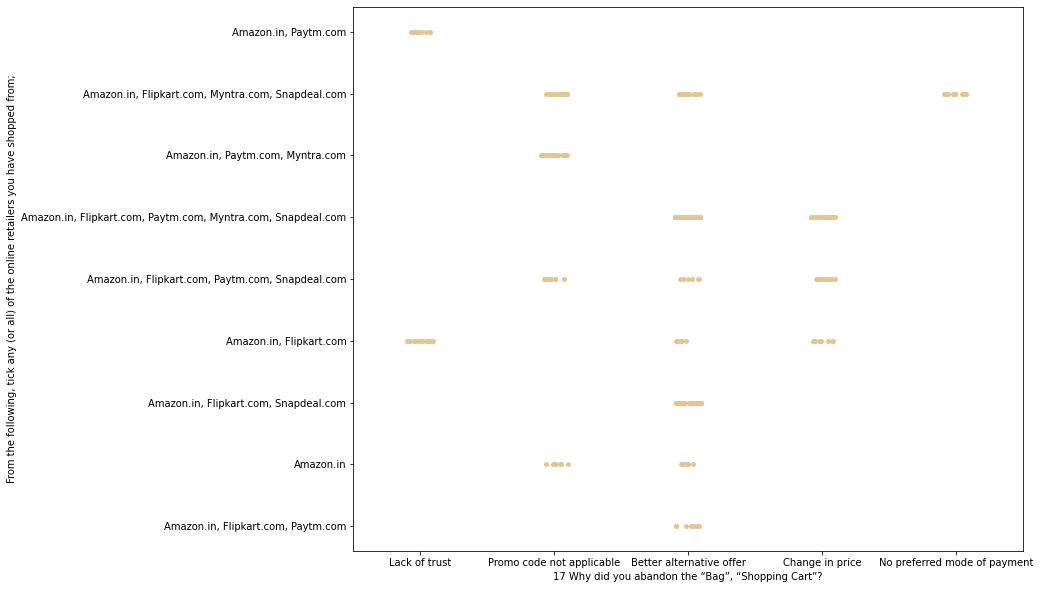

In [32]:
plt.figure(figsize=(12,10))
sns.stripplot(x=df['17 Why did you abandon the “Bag”, “Shopping Cart”?'],
              y=df['From the following, tick any (or all) of the online retailers you have shopped from;'])

Observation :

Another most common reason to abandon purchase decision is promo code not applicable on particular product. 
Followed by next most common reason is change in price.


# Customer Related Analysis

In [33]:
Feature_Customer = ['1Gender of respondent',
                    '2 How old are you?',
                    '3 Which city do you shop online from?',
                    '9 What is the screen size of your mobile device?',
                    '10 What is the operating system (OS) of your device?',
                    '11 What browser do you run on your device to access the website?']

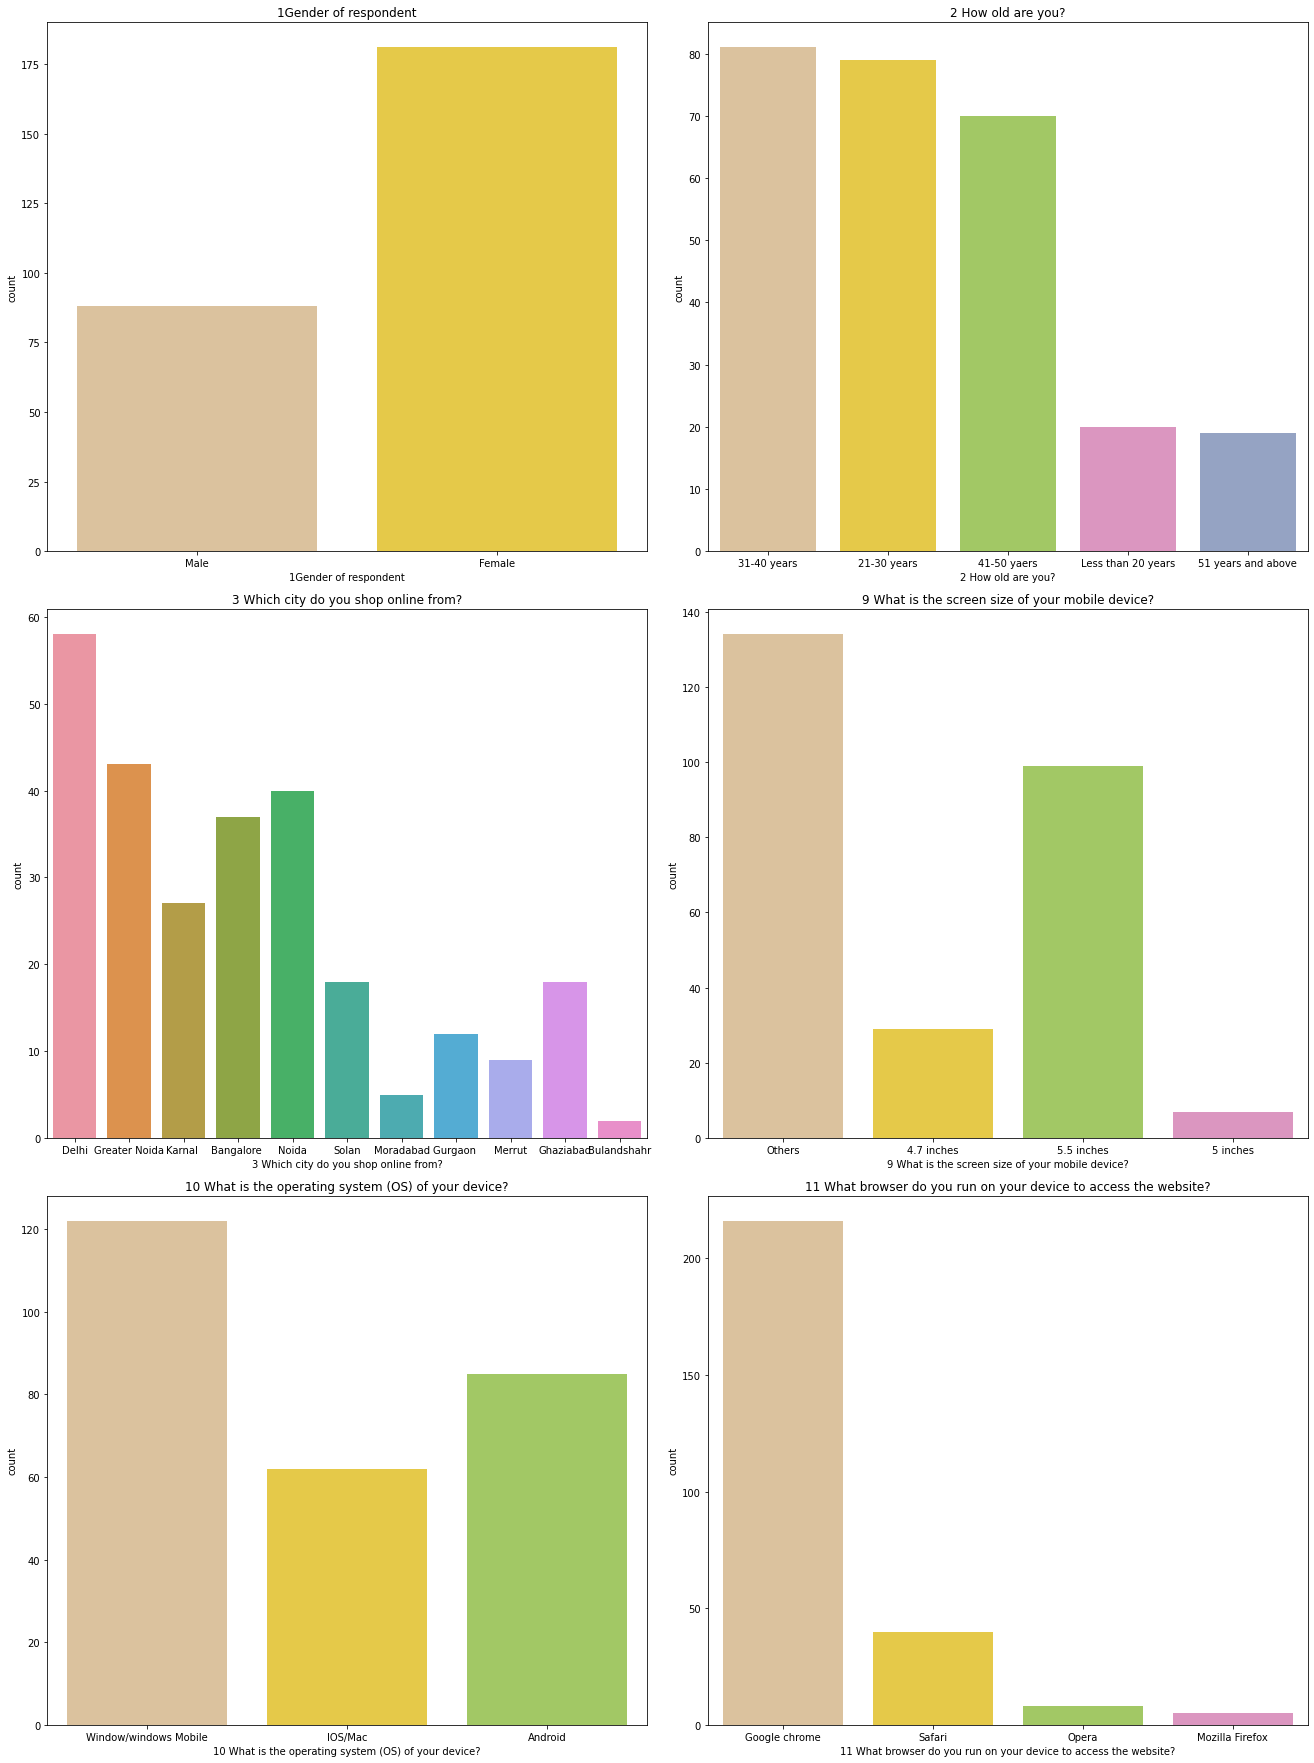

In [34]:
cols = Feature_Customer

n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*9.2,n_rows*8.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols + c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x=df[cols[i]], ax=ax)
        ax.set_title(cols[i])
        
plt.tight_layout()

Observation :

Most Online Shopping Customer belong to Metro Cities. and most of them are FeMale customer

We can conclude that in Metro city like Delhi, Male have more tendency of online shopping.So shopping platform can target this population in marketing.

In Tier 2 & 3 Cities Majority of online shopping customers are Females.

We can target these customer population in these cities.

<AxesSubplot: xlabel='3 Which city do you shop online from?', ylabel='2 How old are you?'>

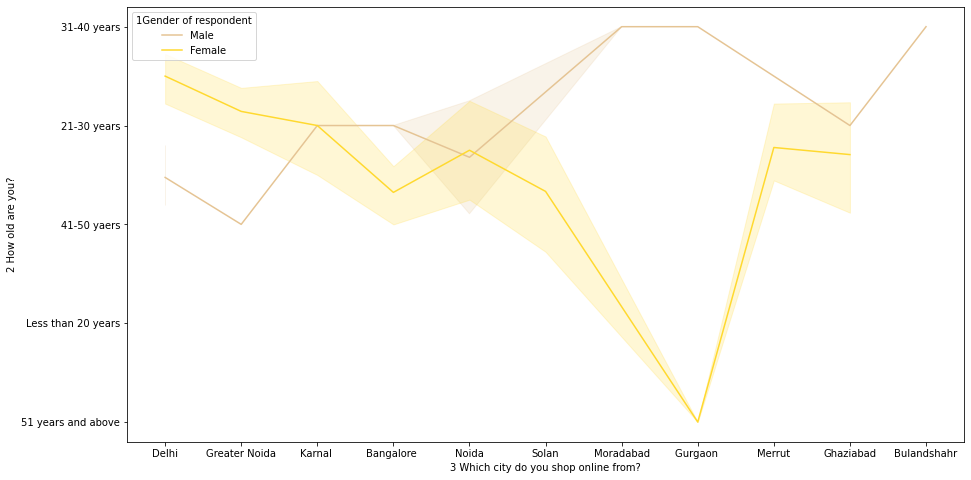

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['3 Which city do you shop online from?'],y=df['2 How old are you?'],hue=df['1Gender of respondent'])

Highest number of people have been shopping online for above 4 years except for the age group below 20 years and above 50 years. 

People who are shopping online for 1-2 years does not include teenagers and elder people.

# Major Factors(Service/System/Info Quality ,Trust & Netbenefit)-Analysis

5(Five) major Factors-->    
service quality, system quality, information quality, trust and net benefit.

In [36]:
Feature_majorfactors = ['Perceived Trustworthiness',
                        '35 Displaying quality Information on the website improves satisfaction of customers',
                        '21 All relevant information on listed products must be stated clearly',
                        '25 Convenient Payment methods',
                        '36 User derive satisfaction while shopping on a good quality website or application',
                        '37 Net Benefit derived from shopping online can lead to users satisfaction',
                        '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
                        '18 The content on the website must be easy to read and understand',
                        '22 Ease of navigation in website',
                        '24 User friendly Interface of the website',
                        'Speedy order delivery']

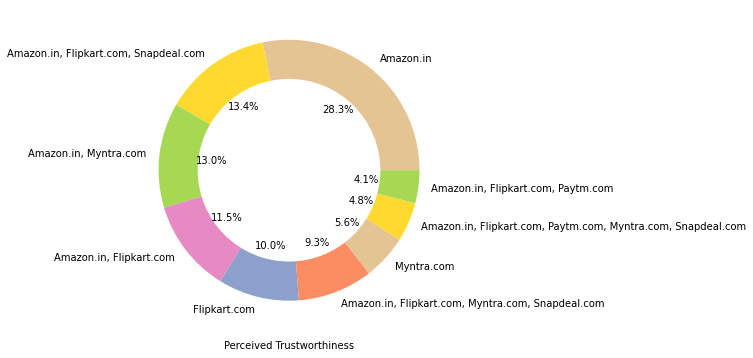

<Figure size 432x288 with 0 Axes>

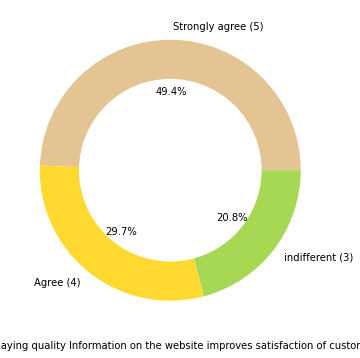

<Figure size 432x288 with 0 Axes>

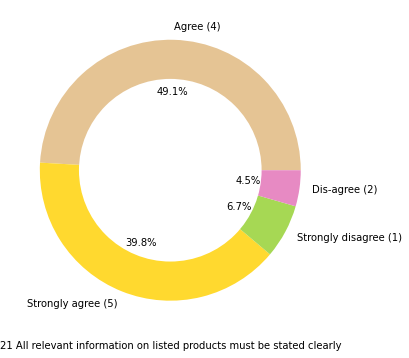

<Figure size 432x288 with 0 Axes>

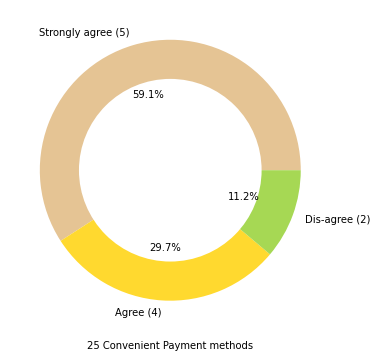

<Figure size 432x288 with 0 Axes>

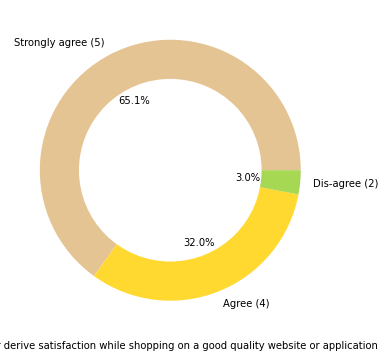

<Figure size 432x288 with 0 Axes>

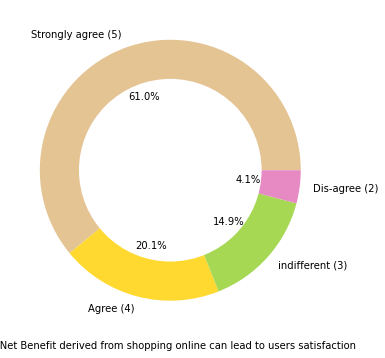

<Figure size 432x288 with 0 Axes>

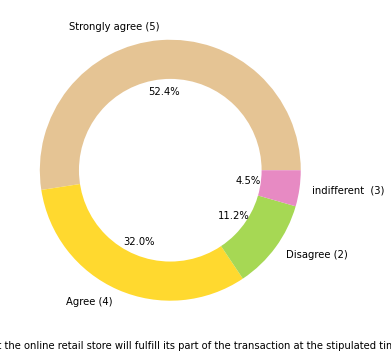

<Figure size 432x288 with 0 Axes>

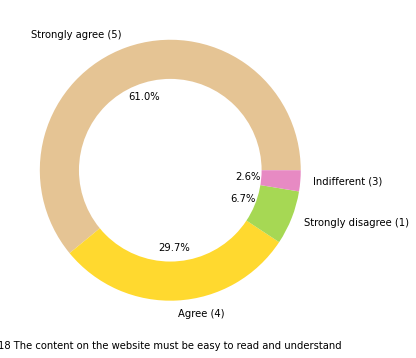

<Figure size 432x288 with 0 Axes>

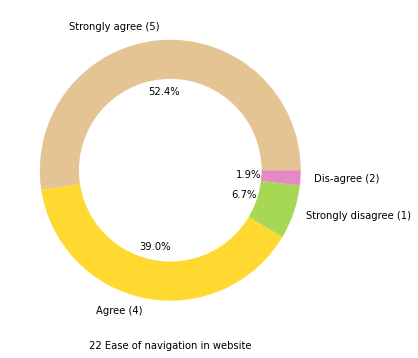

<Figure size 432x288 with 0 Axes>

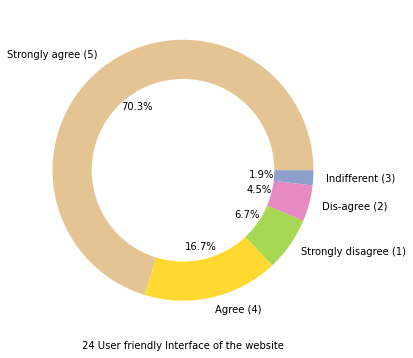

<Figure size 432x288 with 0 Axes>

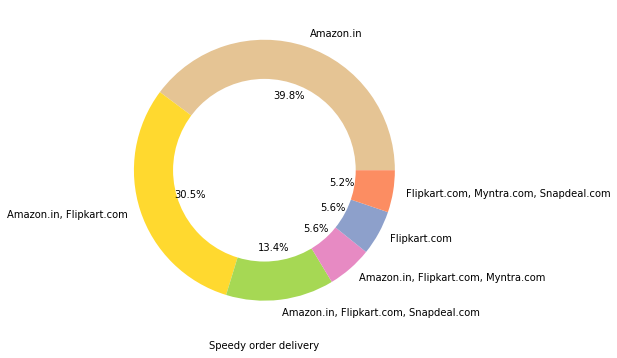

<Figure size 432x288 with 0 Axes>

In [37]:
for i in Feature_majorfactors:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Observation

We already Know more than 90% Customer thinks that gaurantee on privacy of thier information is important for them.
Majority of customers trust Amazon.in more than other shopping platform for Privacy of customers’ information

Amazon.in website is as effient as ealier after updation.

Most of people want shorter delivery time frame, majority customer agree that Paytm.com takes longest time for 
delivery compare to others.

50.2% Customer strongly agree & 36.4% customer agree that for good online shopping complete and relevant product information.

49.4% customer strongly agree and 29.7% customer agree that displaying quality information on website 
helps in decision making inturn improves customer statisfcation.

70.3 % customer strongly agree and 16.7 % customer agree that website should be user friendly.

52.4% of customers strongly agree that website should be easy for navigation.

# Features divided based on Hedonic , Utilitarian , Risk & Major Factors

Hedonic Value-->

    Feature_Gratifiction

    Feature_BestDeal

    Feature_social

    Feature_adventure
    
Utilitarian Values-->

    Feature_productOffer

    Feature_productInfo

    Feature_convenience

    Feature_Savings
    

Feature_risk

Feature_Customer

Feature_majorfactors

In [38]:
pd.crosstab([df['14 How much time do you explore the e- retail store before making a purchase decision?']  ],
            df["6 How many times you have made an online purchase in the past 1 year?"],margins=True).style.background_gradient(cmap='twilight')

Observation

Customer engaged with the eploring e-commerce sites are more likely to be loyal & repeat customers

Dython is a set of data analysis tools in python 3.x

Dython will automatically find which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map we can find the correlation matrix of categorical variables.

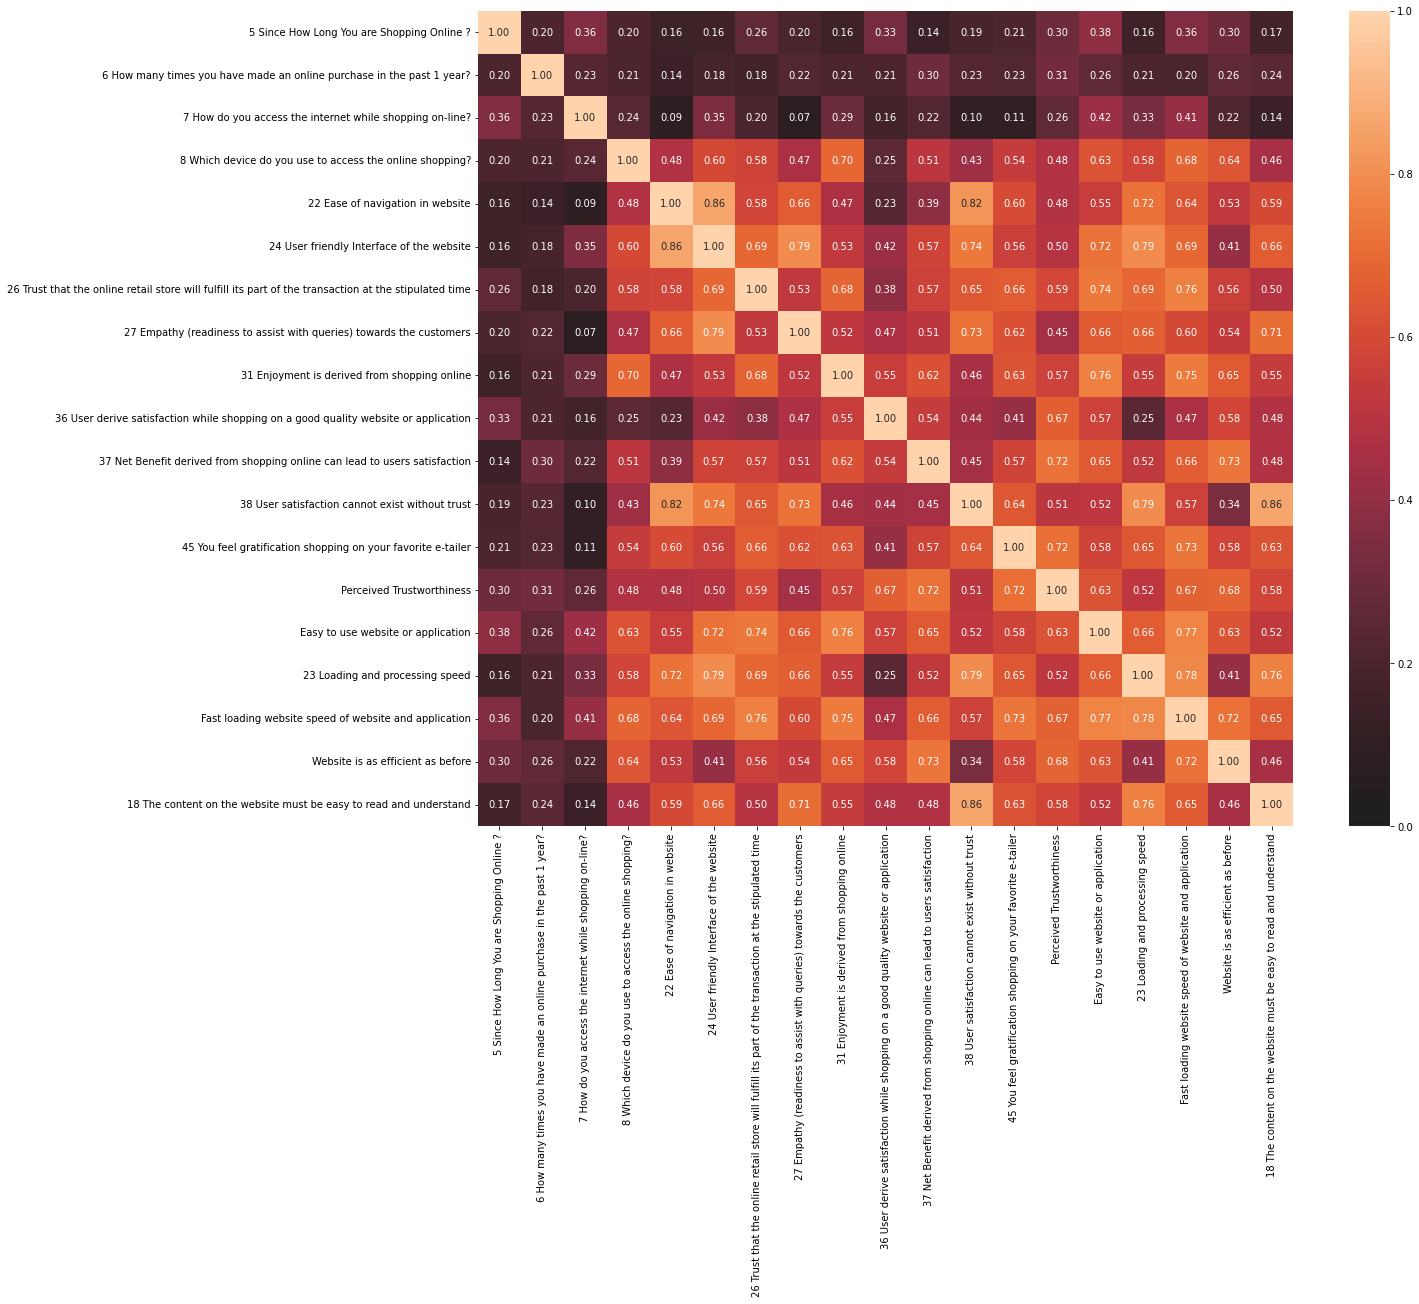

{'corr':                                                     5 Since How Long You are Shopping Online ?  \
 5 Since How Long You are Shopping Online ?                                            1.000000   
 6 How many times you have made an online purcha...                                    0.203974   
 7 How do you access the internet while shopping...                                    0.358575   
 8 Which device do you use to access the online ...                                    0.204264   
 22 Ease of navigation in website                                                      0.156068   
 24 User friendly Interface of the website                                             0.156263   
 26 Trust that the online retail store will fulf...                                    0.263570   
 27 Empathy (readiness to assist with queries) t...                                    0.197520   
 31 Enjoyment is derived from shopping online                                          0.156899   
 3

In [39]:
# !pip install dython

import pandas as pd
from dython.nominal import associations
#HedonicValue
associations(df[Feature_Gratifiction], figsize=(20, 15))


An effect score closer to 0 translates to there being no relationship. 

A score closer to 1 or -1 is a positive or negative relationship. 

A perfect score of 1 is a direct correlation.

Observation

Below are highly correlated based on the scores ~1

18 The content on the website must be easy to read and understand-->(0.86)-->38 User satisfaction cannot exist without trust

22 Ease of navigation in website--(0.82)  -->  38 User satisfaction cannot exist without trust

23 Loading and processing speed->(0.79)-->24 User friendly Interface of the website

27 Empathy (readiness to assist with queries) towards the customers---(0.79) -->24 User friendly Interface of the website




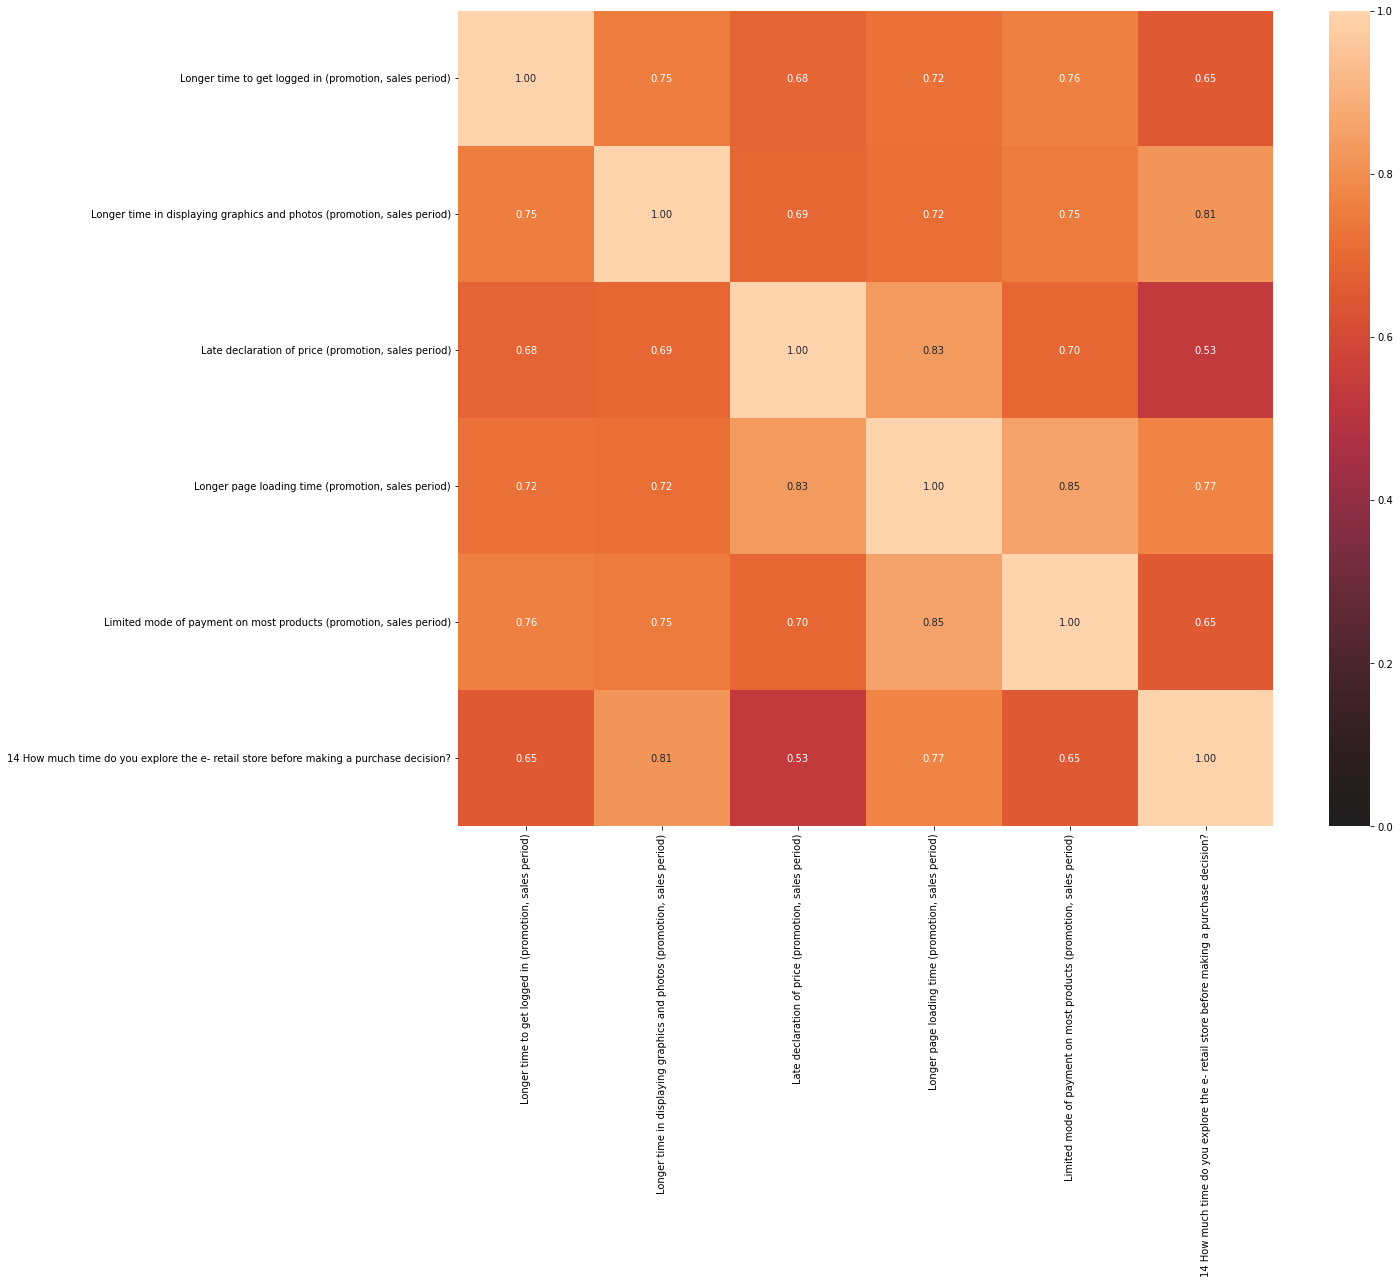

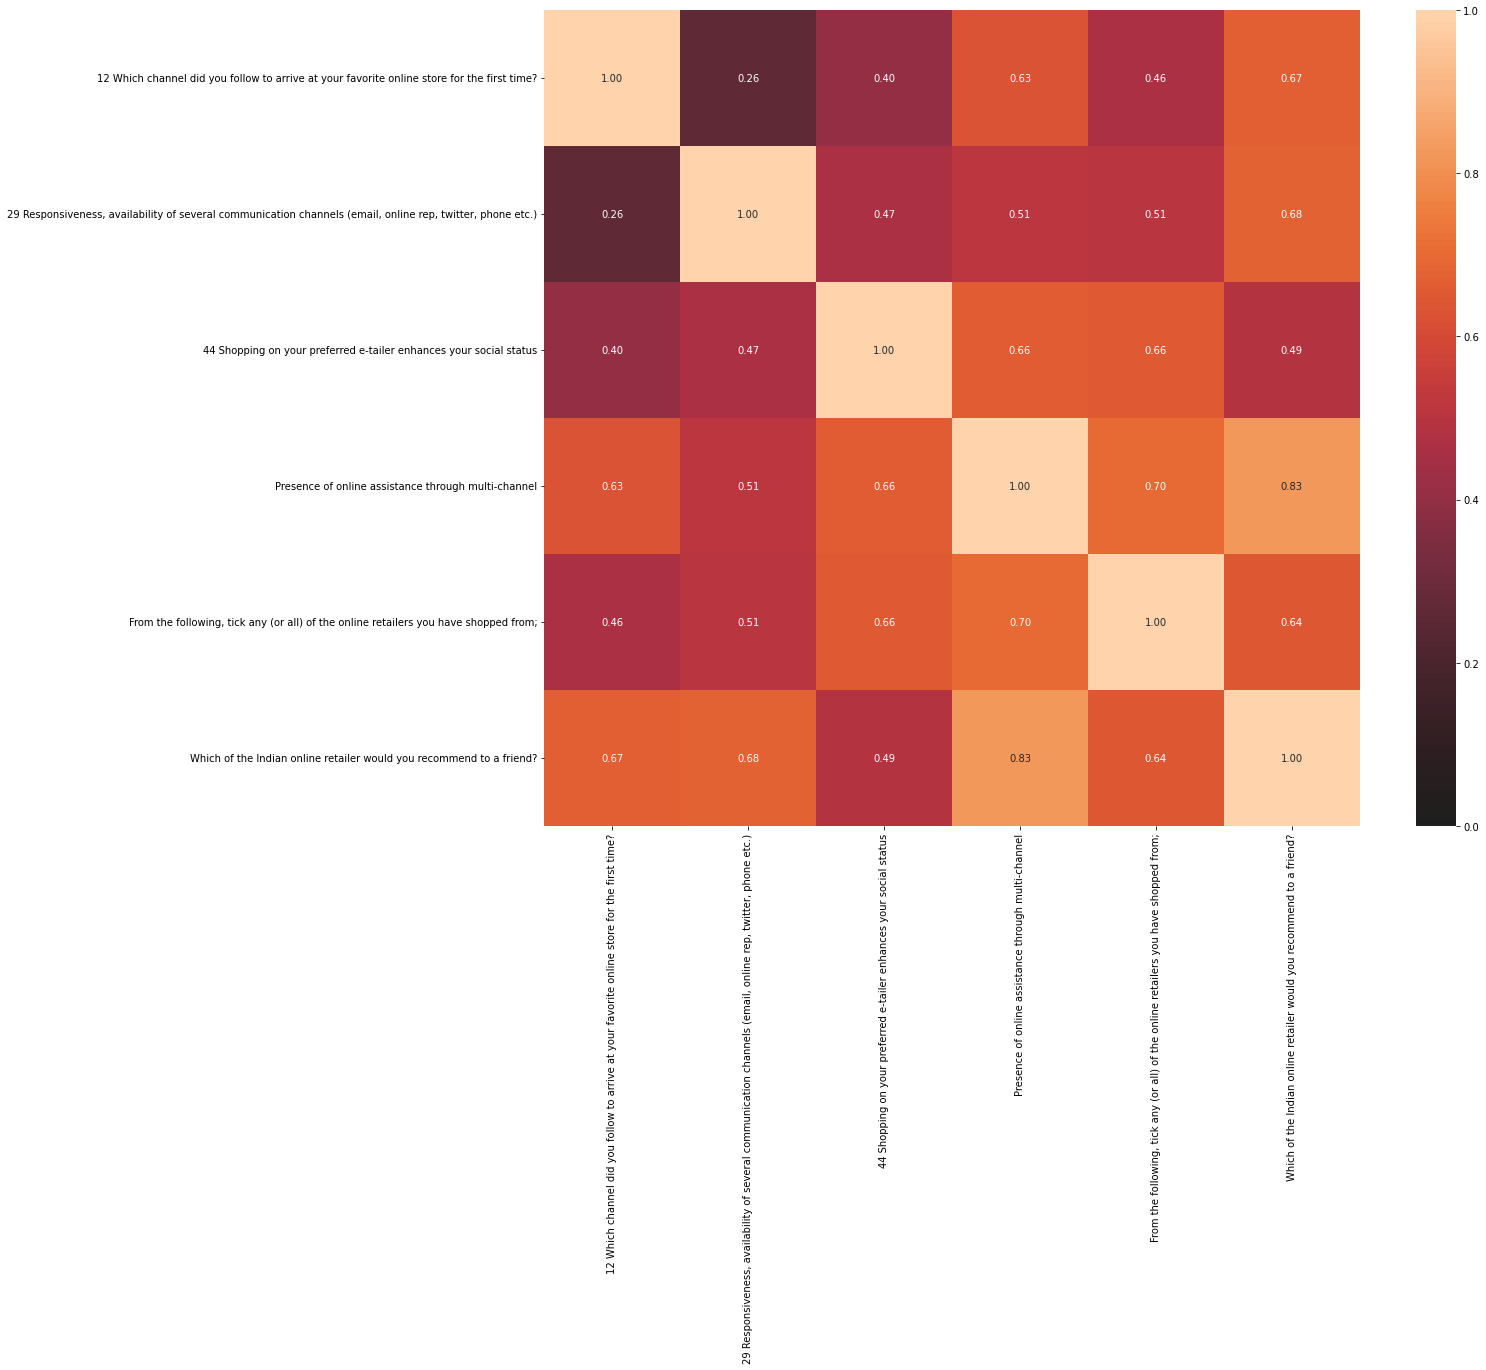

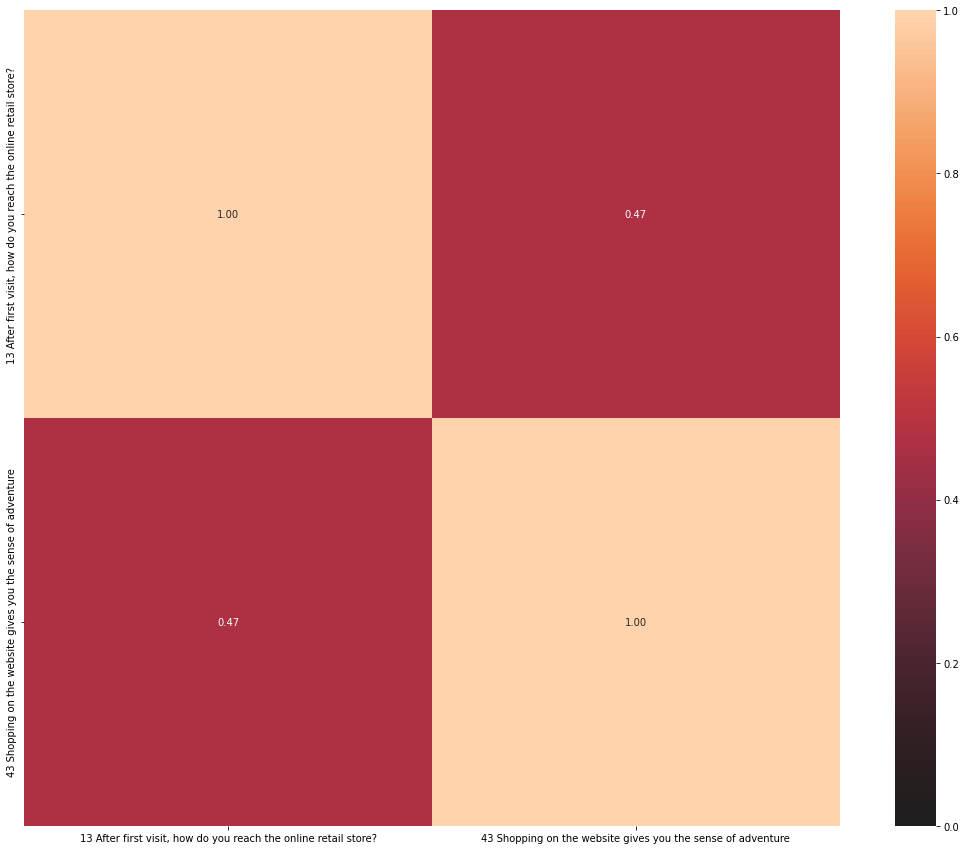

{'corr':                                                     13 After first visit, how do you reach the online retail store?  \
 13 After first visit, how do you reach the onli...                                           1.000000                 
 43 Shopping on the website gives you the sense ...                                           0.471589                 
 
                                                     43 Shopping on the website gives you the sense of adventure  
 13 After first visit, how do you reach the onli...                                           0.471589            
 43 Shopping on the website gives you the sense ...                                           1.000000            ,
 'ax': <AxesSubplot: >}

In [40]:
from dython.nominal import associations

#HedonicValue
associations(df[Feature_BestDeal], figsize=(20, 15))
associations(df[Feature_social], figsize=(20, 15))
associations(df[Feature_adventure], figsize=(20, 15))



Observation 
Highly correlated Variables

Limited mode of payment on most products (promotion, sales period)--->(0.85)-->Longer page loading time (promotion, sales period)

14 How much time do you explore the e- retail store before making a purchase decision?--->(0.77)-->Longer page loading time (promotion, sales period)

+++++

Presence of online assistance through multi-channel-->(0.83)-->Which of the Indian online retailer would you recommend to a friend? 

+++++

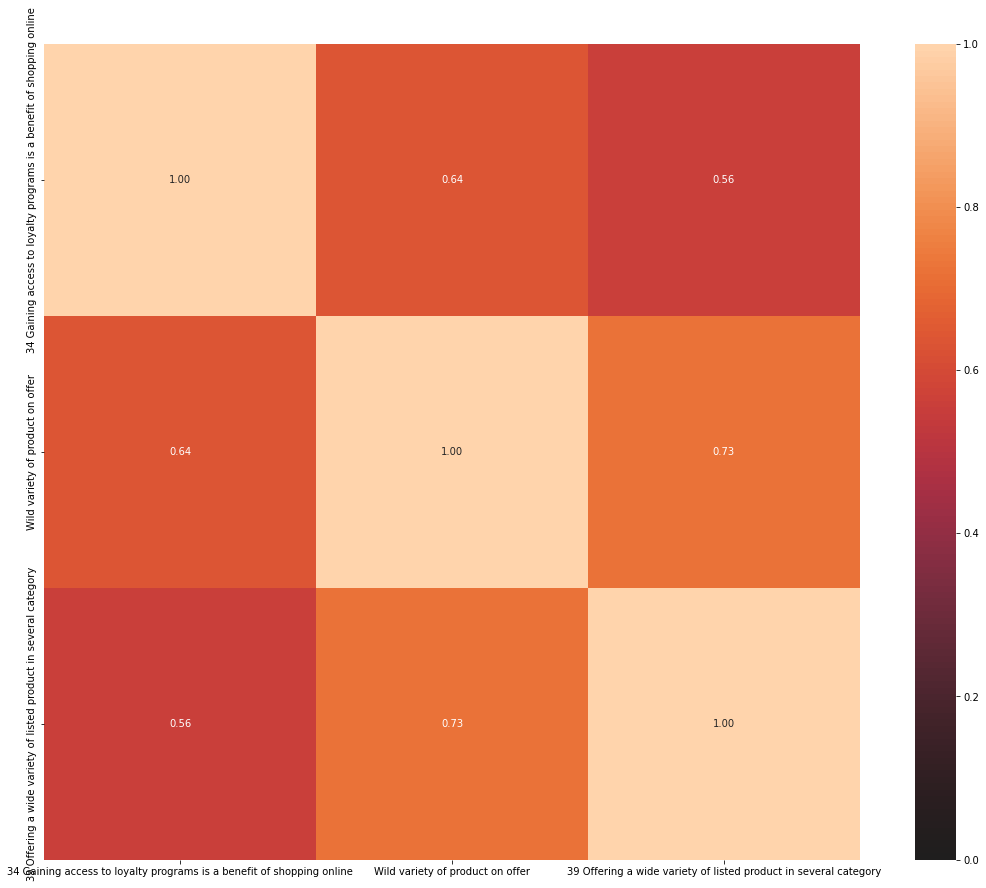

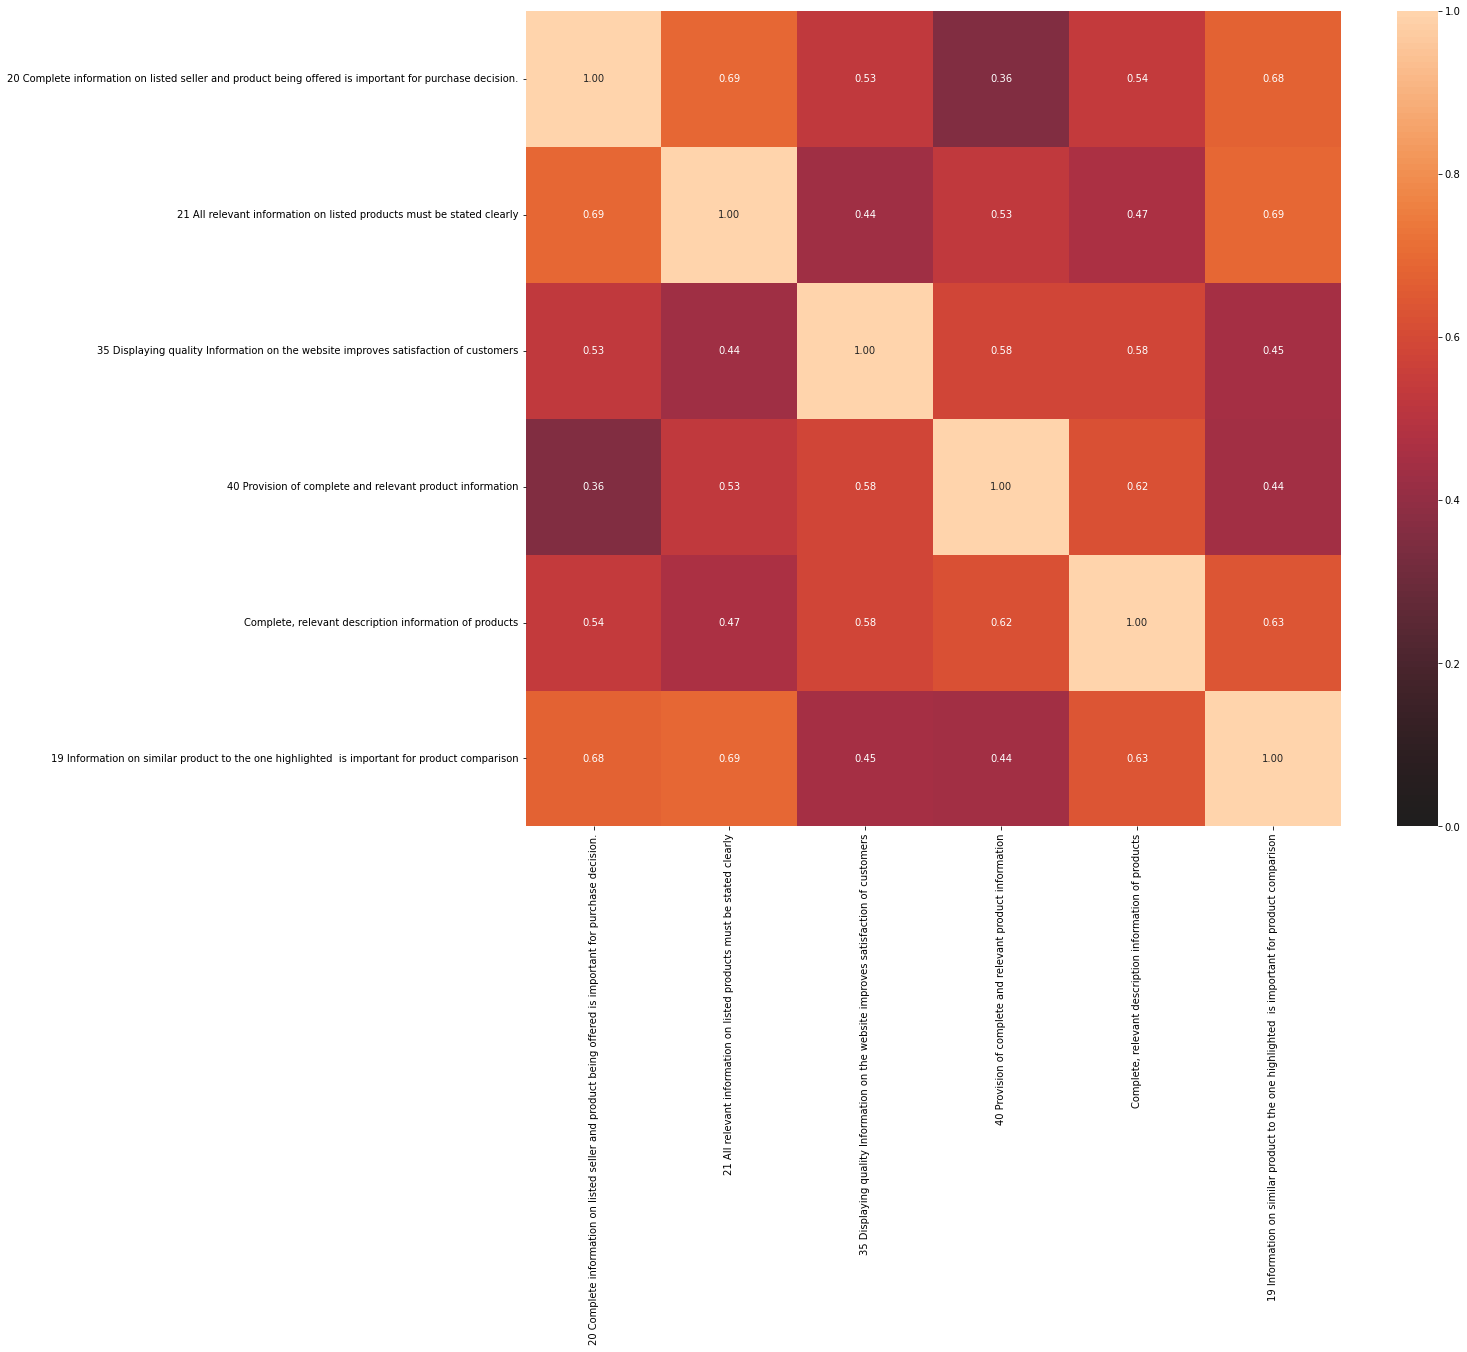

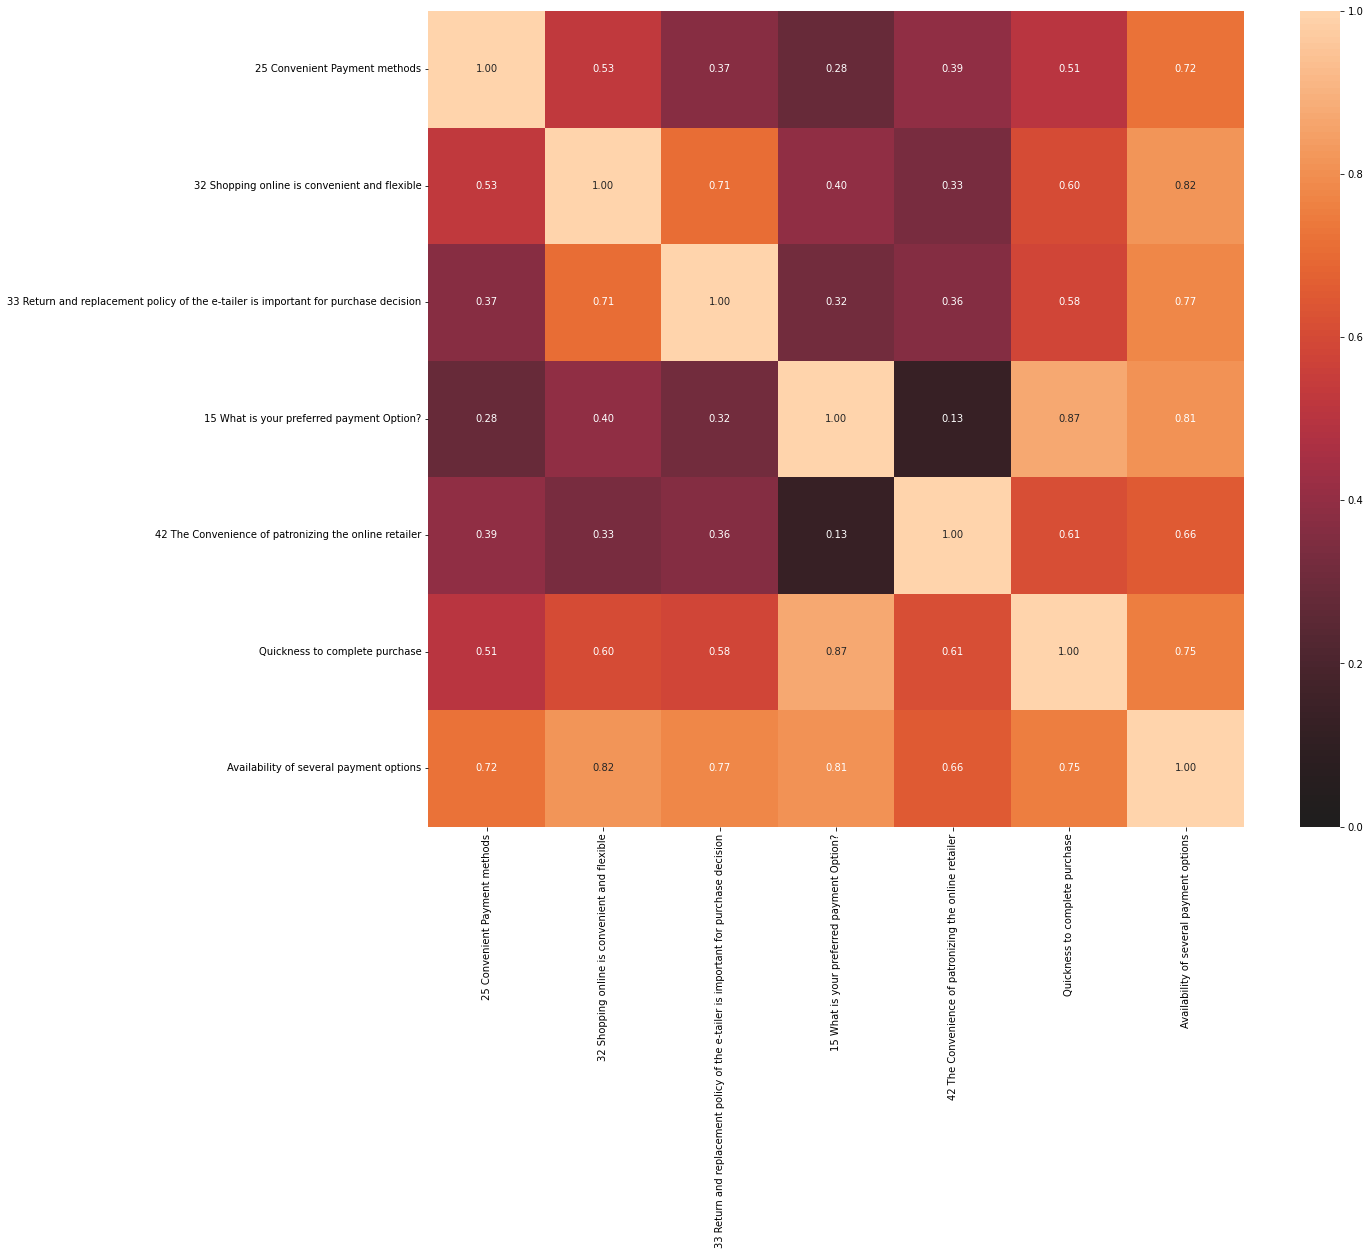

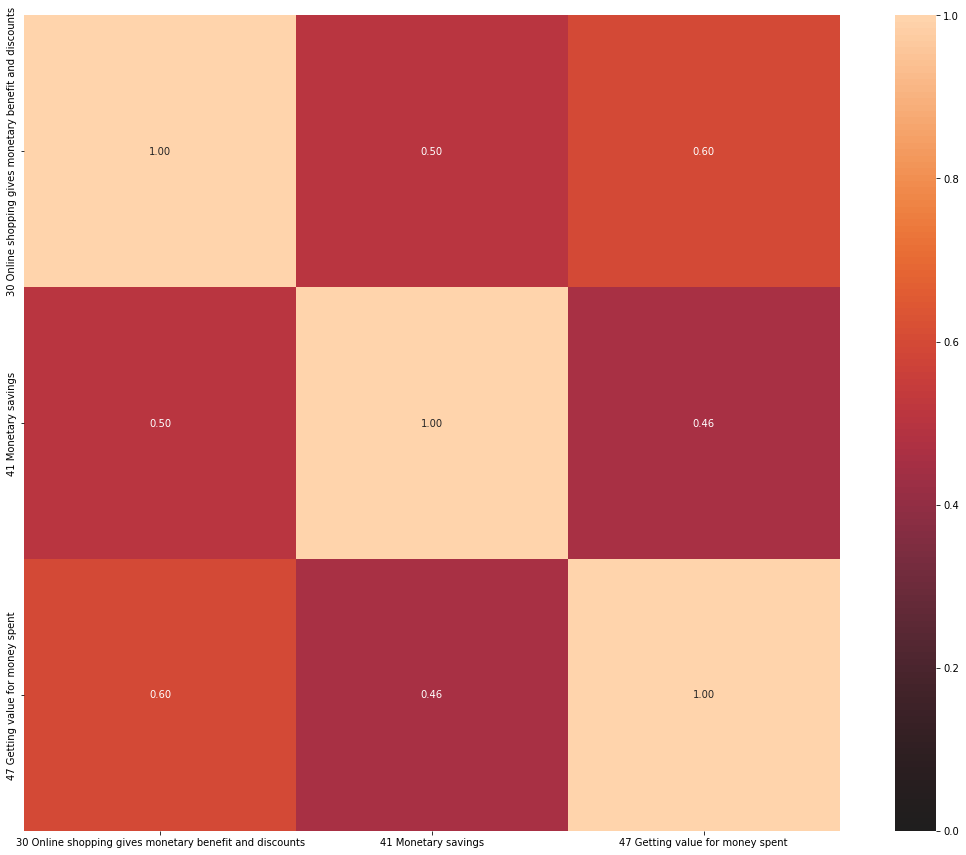

{'corr':                                                     30 Online shopping gives monetary benefit and discounts  \
 30 Online shopping gives monetary benefit and d...                                           1.000000         
 41 Monetary savings                                                                          0.500345         
 47 Getting value for money spent                                                             0.595282         
 
                                                     41 Monetary savings  \
 30 Online shopping gives monetary benefit and d...             0.500345   
 41 Monetary savings                                            1.000000   
 47 Getting value for money spent                               0.457210   
 
                                                     47 Getting value for money spent  
 30 Online shopping gives monetary benefit and d...                          0.595282  
 41 Monetary savings                                        

In [41]:
###utilitarian 
associations(df[Feature_productOffer], figsize=(20, 15))
associations(df[Feature_productInfo], figsize=(20, 15))
associations(df[Feature_convenience], figsize=(20, 15))
associations(df[Feature_Savings], figsize=(20, 15))


Observation


Quickness to complete purchase -->( 0.87 )-->15 What is your preferred payment Option?

32 Shopping online is convenient and flexible-->(0.82)-->Availability of several payment options

Availability of several payment options -->( 0.81 )-->15 What is your preferred payment Option?




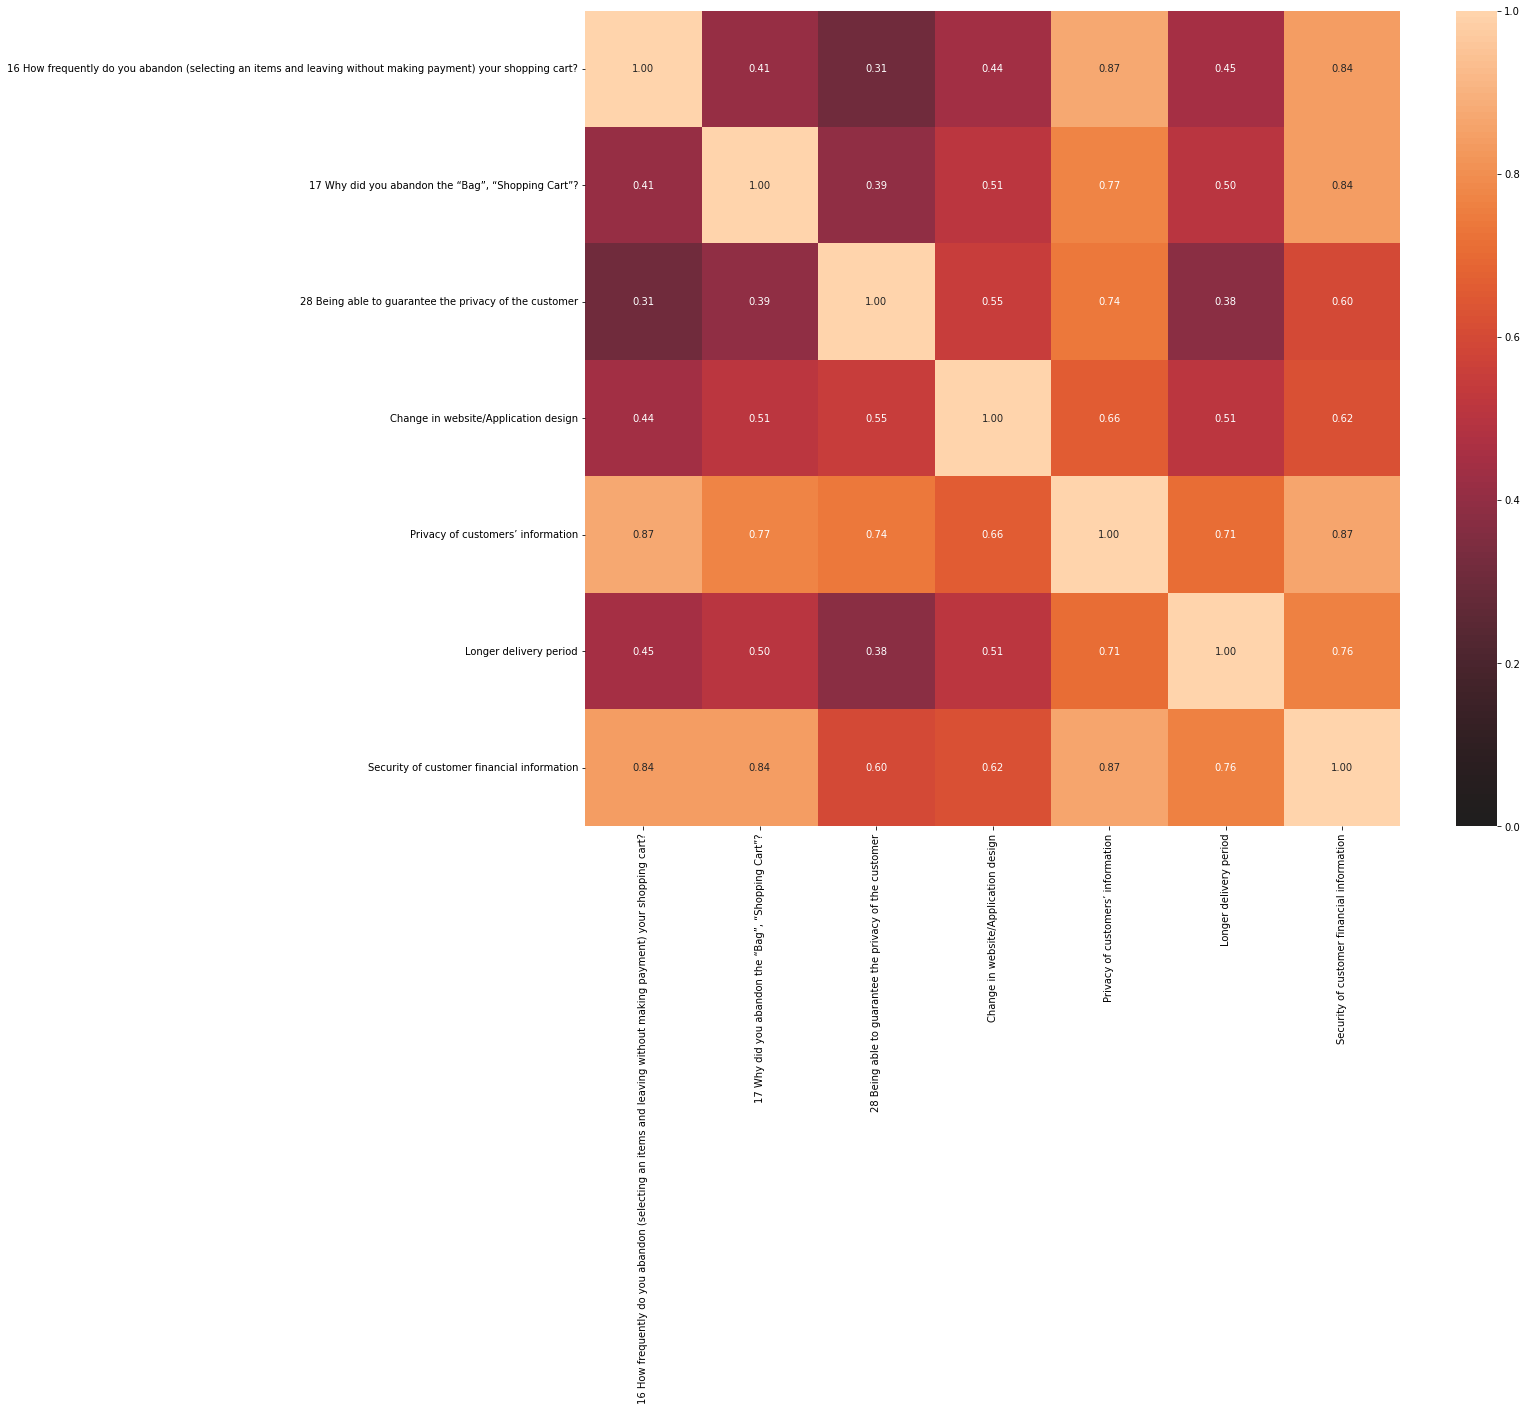

{'corr':                                                     16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?  \
 16 How frequently do you abandon (selecting an ...                                           1.000000                                                              
 17 Why did you abandon the “Bag”, “Shopping Cart”?                                           0.411780                                                              
 28 Being able to guarantee the privacy of the c...                                           0.309538                                                              
 Change in website/Application design                                                         0.439389                                                              
 Privacy of customers’ information                                                            0.871430                                                              
 L

In [42]:

###Percieved Risk Related
associations(df[Feature_risk], figsize=(20, 15))



Observation


Security of customer financial information-->(0.87)-->Privacy of customers’ information

Security of customer financial information-->(0.84)-->16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?

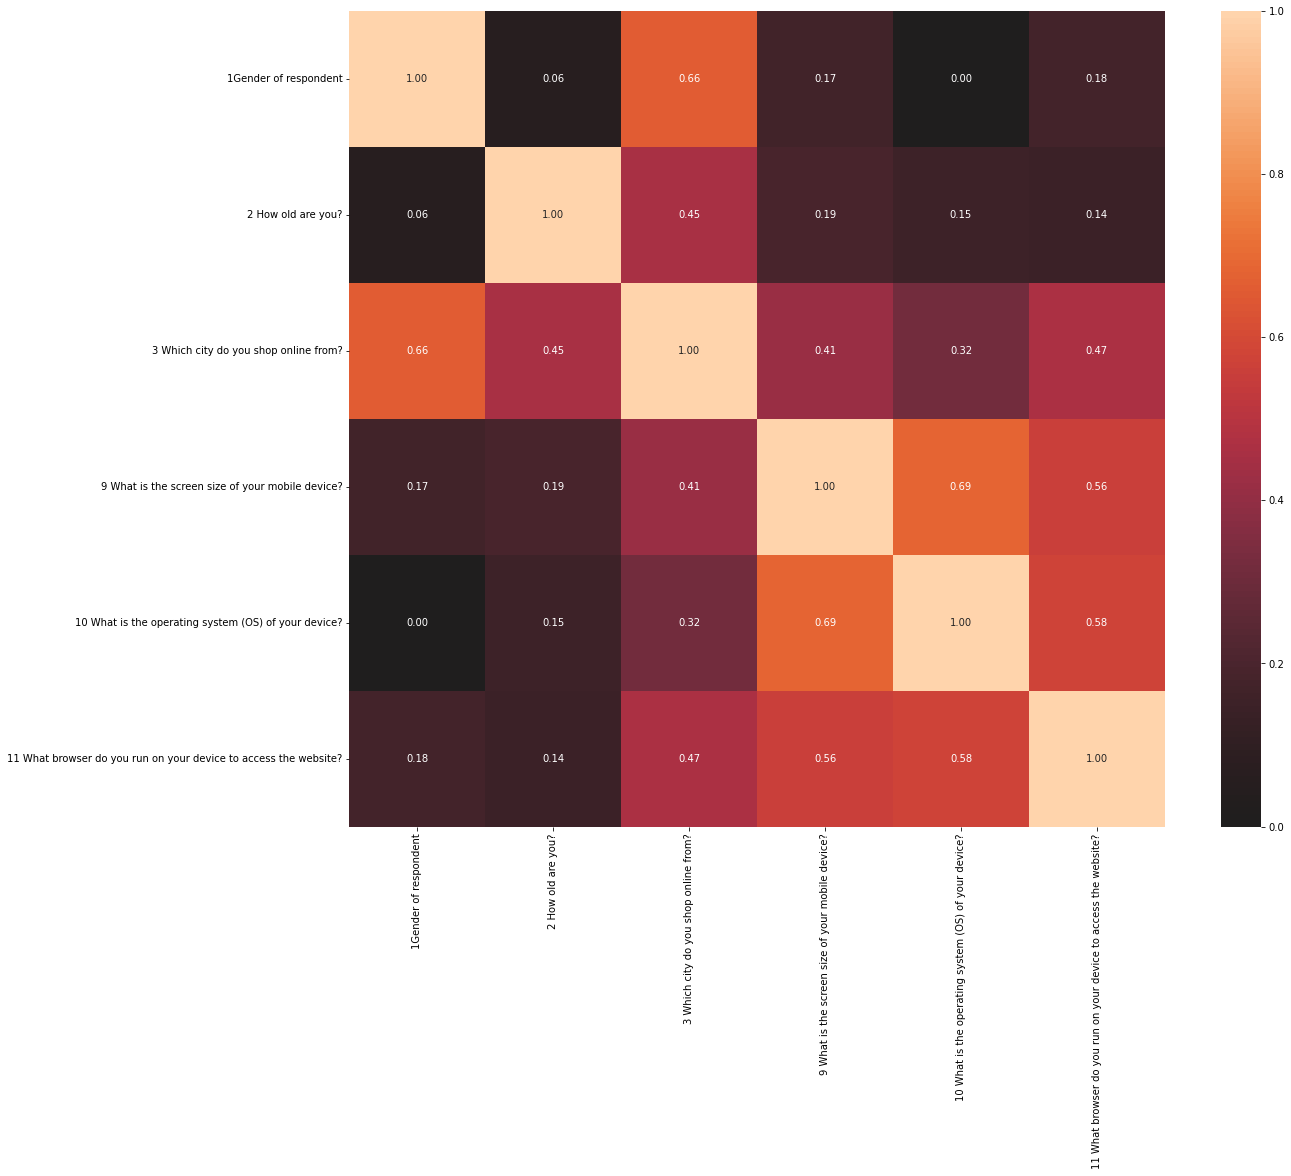

{'corr':                                                     1Gender of respondent  \
 1Gender of respondent                                            1.000000   
 2 How old are you?                                               0.059512   
 3 Which city do you shop online from?                            0.656297   
 9 What is the screen size of your mobile device?                 0.168132   
 10 What is the operating system (OS) of your de...               0.000000   
 11 What browser do you run on your device to ac...               0.177532   
 
                                                     2 How old are you?  \
 1Gender of respondent                                         0.059512   
 2 How old are you?                                            1.000000   
 3 Which city do you shop online from?                         0.454820   
 9 What is the screen size of your mobile device?              0.190987   
 10 What is the operating system (OS) of your de...            0.1506

In [43]:
#Customer Related
associations(df[Feature_Customer], figsize=(20, 15))


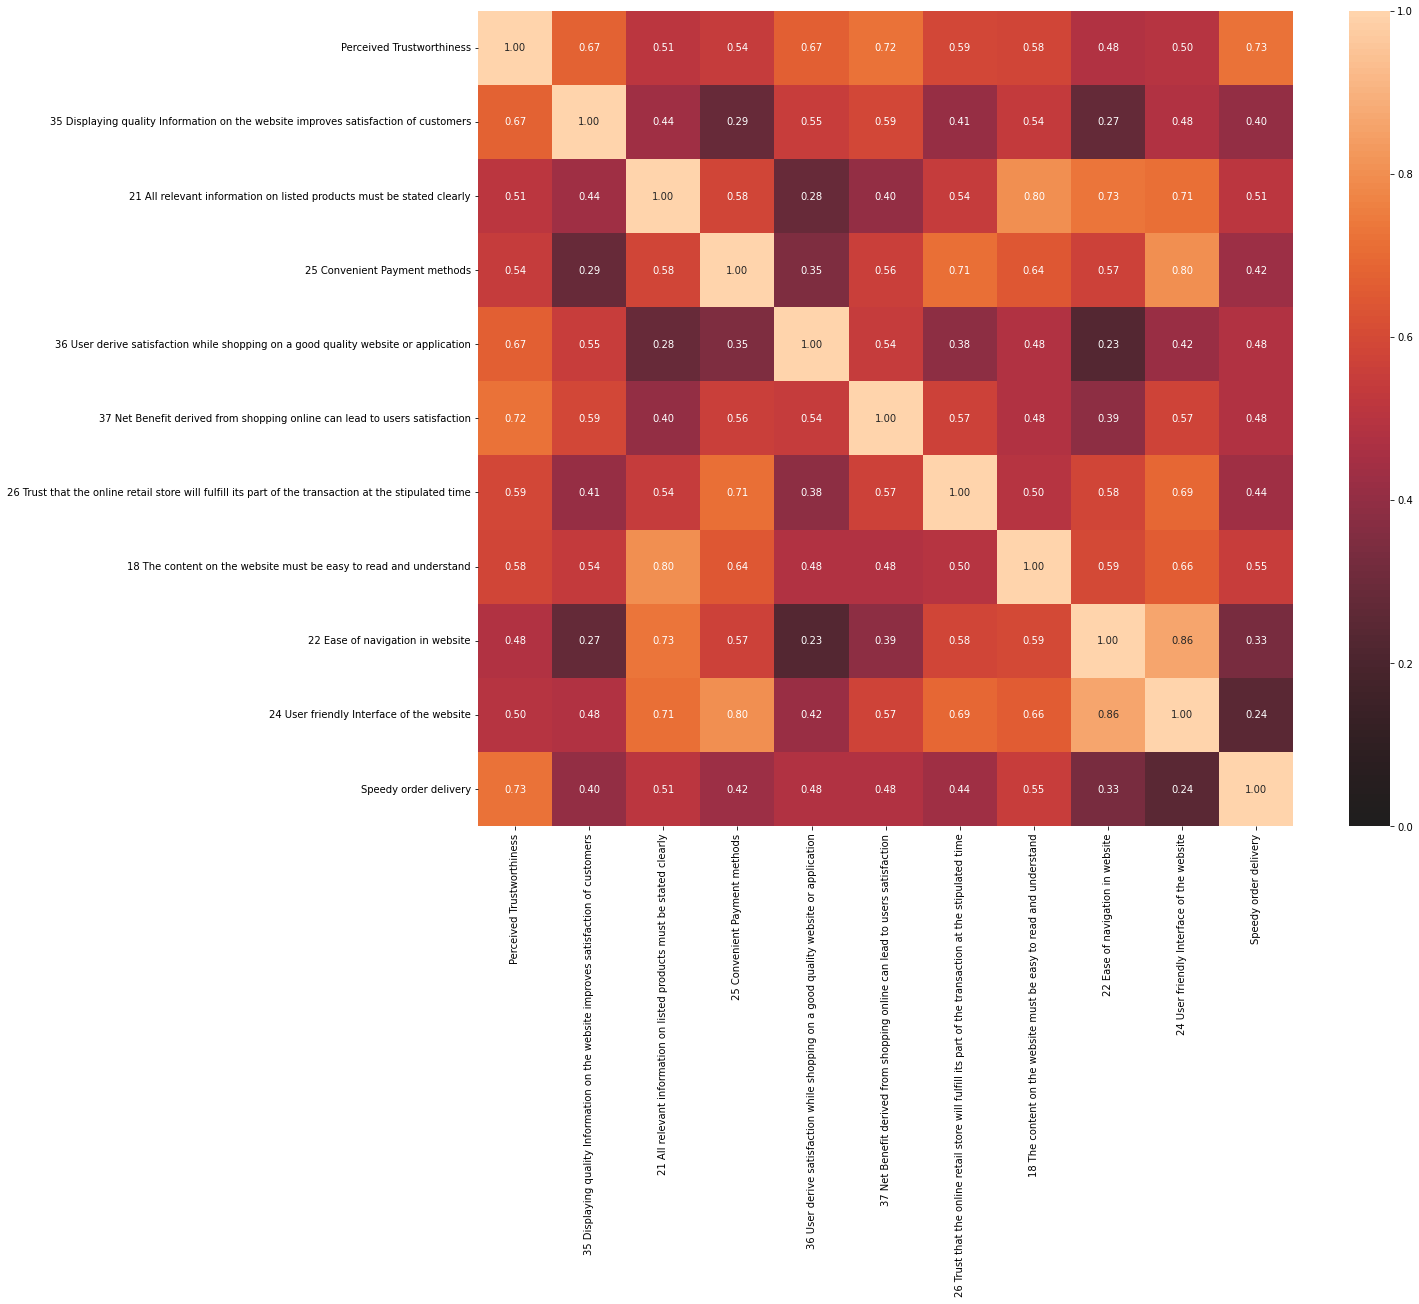

{'corr':                                                     Perceived Trustworthiness  \
 Perceived Trustworthiness                                            1.000000   
 35 Displaying quality Information on the websit...                   0.673877   
 21 All relevant information on listed products ...                   0.513014   
 25 Convenient Payment methods                                        0.541266   
 36 User derive satisfaction while shopping on a...                   0.669643   
 37 Net Benefit derived from shopping online can...                   0.721834   
 26 Trust that the online retail store will fulf...                   0.587598   
 18 The content on the website must be easy to r...                   0.578960   
 22 Ease of navigation in website                                     0.483162   
 24 User friendly Interface of the website                            0.495055   
 Speedy order delivery                                                0.726044   
 
      

In [44]:
#5 Factors--service quality, system quality, information quality, trust and net benefit
associations(df[Feature_majorfactors], figsize=(20, 15))

Observation

24 User friendly Interface of the website-->(0.86)-->22 Ease of navigation in website



Multicollinearity means "Independent variables are highly correlated to each other". 

For categorical variables, multicollinearity can be detected with

    Spearman rank correlation coefficient (ordinal variables)
            Ordinal data classifies data while introducing an order, or ranking. 
            For instance, measuring economic status usingthe hierarchy: 'wealthy', 'middle income' or 'poor. '

    and 
    
    chi-square test (nominal variables).
            nominal variables often include gender, ethnicity, political preferences or student identity number. 
            Variable types that can be coded in only 2 ways (e.g. yes/no or employed/unemployed

Let us jump to Chi-Square test


In [45]:
cat_var1=df['14 How much time do you explore the e- retail store before making a purchase decision?']
cat_var2=df["6 How many times you have made an online purchase in the past 1 year?"]
CrosstabResult=pd.crosstab(index=cat_var1,columns=cat_var2)
#print(CrosstabResult)

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The statistic of the ChiSq Test is:', ChiSqResult[0])
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

#####Another method
chi2_stat, p, dof, expected =chi2_contingency(CrosstabResult)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

The statistic of the ChiSq Test is: 42.67406437592382
The P-Value of the ChiSq Test is: 0.0022569650731995737
chi2 statistic:     42.674
p-value:            0.002257
degrees of freedom: 20
expected frequencies:
 [[ 1.50929368  0.5204461   3.27881041  2.44609665  0.31226766  5.9330855 ]
 [ 4.95910781  1.71003717 10.7732342   8.03717472  1.0260223  19.49442379]
 [ 7.65427509  2.6394052  16.62825279 12.40520446  1.58364312 30.08921933]
 [ 1.61710037  0.55762082  3.51301115  2.62081784  0.33457249  6.35687732]
 [13.26022305  4.57249071 28.80669145 21.49070632  2.74349442 52.12639405]]


H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.

In the above example, the P-value came lesser than 0.05. Hence H0 will not be accepted. Which means the variables are correlated with each other.

This means, if two variables are correlated, then the P-value will come very close to zero.



In [46]:
# importing the required function
from scipy.stats import chi2_contingency
Feature_Savings = ['30 Online shopping gives monetary benefit and discounts',
                   '41 Monetary savings',
                   '47 Getting value for money spent']

Feature_social = ['12 Which channel did you follow to arrive at your favorite online store for the first time?',
                    '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
                    '44 Shopping on your preferred e-tailer enhances your social status',
                    'Presence of online assistance through multi-channel',
                    'From the following, tick any (or all) of the online retailers you have shopped from;',
                    'Which of the Indian online retailer would you recommend to a friend?']

print(len(Feature_Savings))
print(len(Feature_social))
for counti,index in enumerate(Feature_Savings):
    for colcount,column in enumerate(Feature_social):
        print(index,column)
        CrosstabResult=pd.crosstab(index=df[index],columns=df[column])
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        # # P-Value is the Probability of H0 being True
        # # If P-Value&gt;0.05 then only we Accept the assumption(H0)
        print('The statistic of the ChiSq Test of:', ChiSqResult[0])
        print('The P-Value of the ChiSq Test :',ChiSqResult[1])
        print( )
    print("Chi2_test done for index--> ",index)
print("Completed the enitre test",Feature_Savings)        



3
6
30 Online shopping gives monetary benefit and discounts 12 Which channel did you follow to arrive at your favorite online store for the first time?
The statistic of the ChiSq Test of: 51.51877709619317
The P-Value of the ChiSq Test : 2.08438454883641e-08

30 Online shopping gives monetary benefit and discounts 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
The statistic of the ChiSq Test of: 185.42538623903081
The P-Value of the ChiSq Test : 3.278724035179821e-33

30 Online shopping gives monetary benefit and discounts 44 Shopping on your preferred e-tailer enhances your social status
The statistic of the ChiSq Test of: 396.01805560394996
The P-Value of the ChiSq Test : 2.487052381159373e-74

30 Online shopping gives monetary benefit and discounts Presence of online assistance through multi-channel
The statistic of the ChiSq Test of: 388.4447867321792
The P-Value of the ChiSq Test : 1.0961108048898759e-60

30 Online shoppi

H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.

In the above example, the P-value came lesser than 0.05. Hence H0 will not be accepted. Which means the variables are  correlated with each other.

This means, if two variables are correlated, then the P-value will come very close to zero.

In [47]:
# importing the required function
from scipy.stats import chi2_contingency
Feature_productOffer = ['34 Gaining access to loyalty programs is a benefit of shopping online',
                        'Wild variety of product on offer',
                        '39 Offering a wide variety of listed product in several category']

Feature_Gratifiction= ['5 Since How Long You are Shopping Online ?',
                        '6 How many times you have made an online purchase in the past 1 year?',
                        '7 How do you access the internet while shopping on-line?',
                        '8 Which device do you use to access the online shopping?',
                        '22 Ease of navigation in website',
                        '24 User friendly Interface of the website',
                        '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
                        '27 Empathy (readiness to assist with queries) towards the customers',
                        '31 Enjoyment is derived from shopping online',
                        '36 User derive satisfaction while shopping on a good quality website or application',
                        '37 Net Benefit derived from shopping online can lead to users satisfaction',
                        '38 User satisfaction cannot exist without trust',
                        '45 You feel gratification shopping on your favorite e-tailer',
                        'Perceived Trustworthiness',
                        'Easy to use website or application',
                        '23 Loading and processing speed',
                        'Fast loading website speed of website and application',
                        'Website is as efficient as before',
                        '18 The content on the website must be easy to read and understand']

print(len(Feature_productOffer))
print(len(Feature_Gratifiction))

corr_chi2=[]
for counti,index in enumerate(Feature_productOffer):
    for colcount,column in enumerate(Feature_Gratifiction):
        print(index,column)
        CrosstabResult=pd.crosstab(index=df[index],columns=df[column])
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        # # P-Value is the Probability of H0 being True
        # # If P-Value&gt;0.05 then only we Accept the assumption(H0)
        print('The statistic of the ChiSq Test of:', ChiSqResult[0])
        print('The P-Value of the ChiSq Test :',ChiSqResult[1])    
        print("Chi2_test")
        print( )
    print("Chi2_test done for index--> ",index)
print("Completed the enitre test",Feature_Savings)


3
19
34 Gaining access to loyalty programs is a benefit of shopping online 5 Since How Long You are Shopping Online ?
The statistic of the ChiSq Test of: 35.30161708850075
The P-Value of the ChiSq Test : 0.0036132435670288565
Chi2_test

34 Gaining access to loyalty programs is a benefit of shopping online 6 How many times you have made an online purchase in the past 1 year?
The statistic of the ChiSq Test of: 130.69093773259195
The P-Value of the ChiSq Test : 2.8918397652585252e-18
Chi2_test

34 Gaining access to loyalty programs is a benefit of shopping online 7 How do you access the internet while shopping on-line?
The statistic of the ChiSq Test of: 47.342522462974706
The P-Value of the ChiSq Test : 4.066091086449951e-06
Chi2_test

34 Gaining access to loyalty programs is a benefit of shopping online 8 Which device do you use to access the online shopping?
The statistic of the ChiSq Test of: 91.89540789944355
The P-Value of the ChiSq Test : 2.1188970116794323e-14
Chi2_test

34 Gaini

Observation on the correlation based on P-Value-->

p < 0.05, then A and B are dependent

Feature_productOffer is correlated or dependent on  Feature_Gratifiction



Combination of both utilitarian value and hedonistic values 

are needed to affect the repeat purchase intention (loyalty) positively

# Analysis on the basis of Various following factors

# Intention of Repeat purchase


In [48]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above
df['6 How many times you have made an online purchase in the past 1 year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

<AxesSubplot: xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

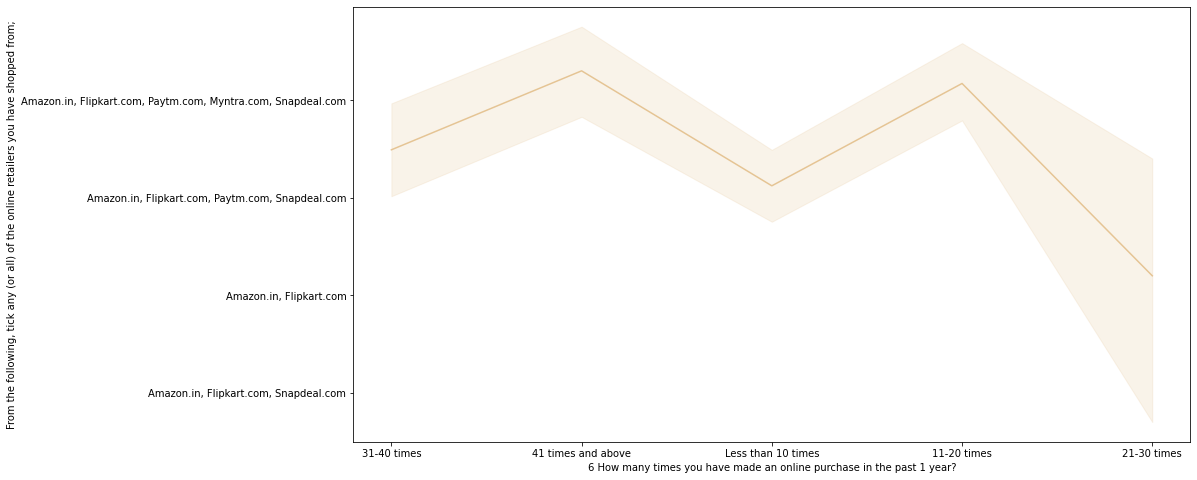

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['6 How many times you have made an online purchase in the past 1 year?'] ,
             y=df['From the following, tick any (or all) of the online retailers you have shopped from;'],data=df)


Heavy shoppers who shop more than 41 times a year shop from all the online brands, 

some of the people who shop for 32-40 and less than 10 times a year seem to exclude myntra.

People shop from Amazon and flipkart whatever be the case.

In [50]:
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['6 How many times you have made an online purchase in the past 1 year?'].replace(dict)
df['Average times made an online purchase']

0      35
1      45
2      45
3       5
4      15
       ..
264     5
265    35
266     5
267     5
268    35
Name: Average times made an online purchase, Length: 269, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

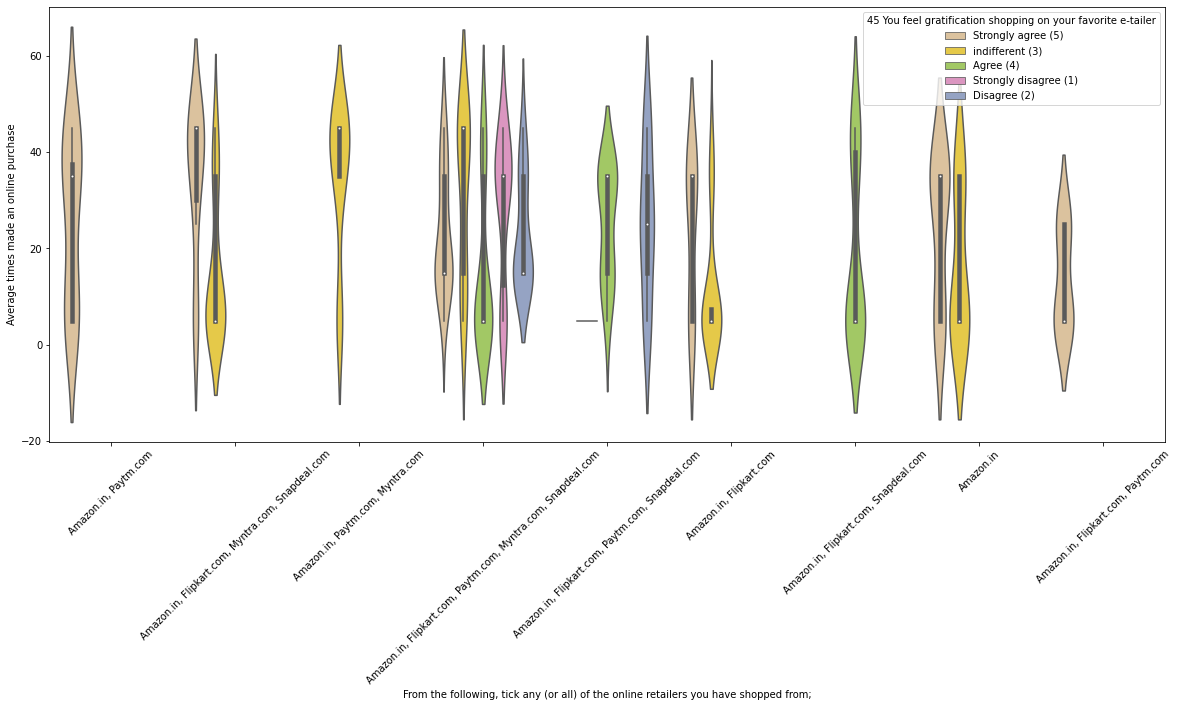

In [51]:
plt.figure(figsize=(20,8))
sns.violinplot(x=df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               y=df['Average times made an online purchase'],hue=df['45 You feel gratification shopping on your favorite e-tailer'])
             
plt.xticks(rotation=45)

Almost all the people who have shopped from amazon, flipkart and paytm are satisfied. 

People who shop from a more number of online brands dosent seem to be satisfied.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

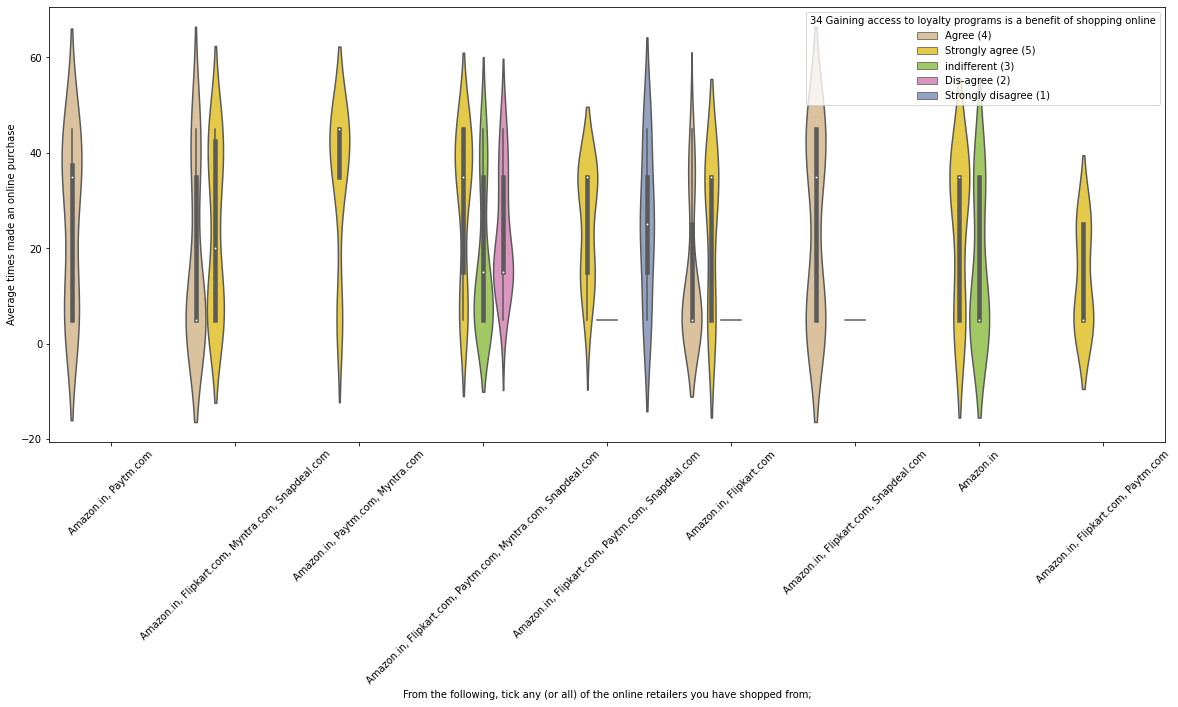

In [52]:
plt.figure(figsize=(20,8))
sns.violinplot(x=df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               y=df['Average times made an online purchase'],hue=df['34 Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

Observation

People shopping from amazon and paytm are getting benefits from the loyalty points,

flipkart and sanpdeal also seem to give such benefits but people who shop from 
almost everywhere disagree with this statement too


In [53]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['5 Since How Long You are Shopping Online ?'].replace(dict)

<AxesSubplot: xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

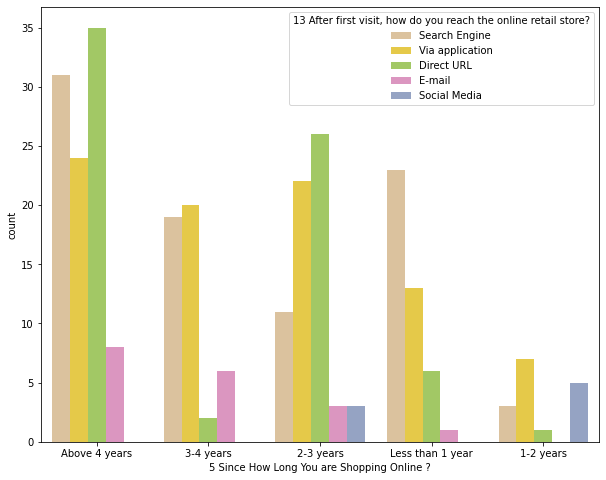

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['5 Since How Long You are Shopping Online ?'],
              hue=df['13 After first visit, how do you reach the online retail store?'],data=df)

Even though people who are shopping online for more than 3 years donot use the application 
rather use search engine and direct url's in large number 

which indicates that online brands should update all their platforms rather than just application.

# Conclusion

Customer satisfaction ---==>key for purchase, repurchase intentions and customer loyalty

    Hedonistic values ++  Utilitarian values ====>  affect the repeat purchase intention (loyalty) positively

        &&  

    Percieved Risk + Hedonic Value && Percieved Risk + Utilitarian Value
           

==========>  Repeat Purchase/Customer Rentention 
    
___________________
Customer retention (UV+HV)

	People shopping from amazon and paytm are getting benefits from the loyalty points
    
	People who shop from a greater number of online brands doesn't seem to be satisfied.
    
	Loyal customers prefer buying and tend to spend more money on shopping in your store. Statistics show that engaged consumers purchase more frequently
    
	People shop from Amazon and flipkart whatever be the case.

Customer Retention (reduce risks)

	Online brands should update all their platforms rather than just application


